<a href="https://colab.research.google.com/github/Nandhini-ds/wikipedia-view-count-forecasting/blob/main/Ad_Ease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**About Ad Ease**

*  Ad Ease is an advertising and marketing technology company that helps businesses maximize ad clicks at minimum cost through effective and economical ad placement. To support this goal, Ad Ease analyzes Wikipedia per-page view data to understand audience attention across different topics and languages.

*  You are part of the Data Science team at Ad Ease, working with 550 days of historical Wikipedia page-view data comprising daily view counts for approximately 145,000 pages across multiple languages. The task is to analyze historical traffic patterns and forecast future page views to support data-driven ad placement decisions.

#**Objective**

The objective of this project is to forecast daily page views for Wikipedia page across different languages using historical data from the past 550 days. These forecasts will help the business anticipate future traffic trends and make informed decisions to optimize ad placement, inventory allocation effectively and economically. This is achieved by building and evaluating time series forecasting models.

**Data Import and Library Setup**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('train_1.csv')
df.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0  ...        32.0        63.0        15.0        26.0   
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         NaN  ...        48.0         9.0        25.0        13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

 **Basic Exploration of Data**

In [ ]:
df.shape

(145063, 551)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [ ]:
df.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [ ]:
(df.isna().sum()/len(df))*100

Page           0.000000
2015-07-01    14.297236
2015-07-02    14.349627
2015-07-03    14.162123
2015-07-04    14.237952
                ...    
2016-12-27     2.551305
2016-12-28     2.634717
2016-12-29     2.637475
2016-12-30     2.505808
2016-12-31     2.388617
Length: 551, dtype: float64

Each column represents viewer counts for different Wikipedia pages. The dataset does not contain missing dates, instead missing values arise from viewer counts for certain Wikipedia pages.

In [ ]:
exo=pd.read_csv("Exog_Campaign_eng")
exo.head()

Exog
0     0
1     0
2     0
3     0
4     0

In [ ]:
exo.shape

(550, 1)

In [ ]:
exo.isna().sum()

Exog    0
dtype: int64

There is no missing values in the exogenous variable.

In [ ]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [ ]:
df['Page'].nunique()

145063

In [ ]:
df['Page'].sample(20)

9376      Italian_constitutional_referendum,_2016_en.wik...
40253     Justin_Timberlake_en.wikipedia.org_all-access_...
32308     2016_ICC_World_Twenty20_en.wikipedia.org_all-a...
32178         浮士德的微笑_zh.wikipedia.org_all-access_all-agents
97601      Fallout_4_ru.wikipedia.org_all-access_all-agents
62977               黃毓民_zh.wikipedia.org_desktop_all-agents
2822            獵巫行動：大滅絕_zh.wikipedia.org_all-access_spider
104038    Чемпионат_мира_по_гандболу_среди_мужчин_2017_r...
89457         岡崎サービスエリア_ja.wikipedia.org_desktop_all-agents
73686     India_at_the_2012_Summer_Olympics_en.wikipedia...
79065     Category:Footjob_commons.wikimedia.org_mobile-...
104662      Покров_день_ru.wikipedia.org_desktop_all-agents
53700     Jean-Pascal_Lacoste_fr.wikipedia.org_mobile-we...
5808      Rosamund_Pike_fr.wikipedia.org_desktop_all-agents
47536     Lethal_Weapon_(Fernsehserie)_de.wikipedia.org_...
100830    Скарсгорд,_Александр_ru.wikipedia.org_all-acce...
46144     File:Mach_effect_sequence.svg_commons.wikimedi...
18286     Анисина,_Марина_Вячеславовна_ru.wikipedia.org_...
98625     Франко,_Джеймс_ru.wikipedia.org_all-access_all...
15128     File:Pine_cones,_male_and_female.jpg_commons.w...
Name: Page, dtype: object

Each row corresponds to a unique Wikipedia page. To enable meaningful analysis, we extract additional attributes such as language and access type from the page identifier.

In [ ]:
df['Page'].str.split("_",expand=True).head()

0                 1           2       3     4                 5   \
0     2NE1  zh.wikipedia.org  all-access  spider  None              None   
1      2PM  zh.wikipedia.org  all-access  spider  None              None   
2       3C  zh.wikipedia.org  all-access  spider  None              None   
3  4minute  zh.wikipedia.org  all-access  spider  None              None   
4       52                Hz           I    Love   You  zh.wikipedia.org   

           6       7     8     9   ...    25    26    27    28    29    30  \
0        None    None  None  None  ...  None  None  None  None  None  None   
1        None    None  None  None  ...  None  None  None  None  None  None   
2        None    None  None  None  ...  None  None  None  None  None  None   
3        None    None  None  None  ...  None  None  None  None  None  None   
4  all-access  spider  None  None  ...  None  None  None  None  None  None   

     31    32    33    34  
0  None  None  None  None  
1  None  None  None  None  
2  None  None  None  None  
3  None  None  None  None  
4  None  None  None  None  

[5 rows x 35 columns]

In [ ]:
ad_ease= df.copy()

**Data seperation**

In [ ]:
ad_ease['Title']=ad_ease['Page'].str.extract(r'^(.*?)(?=_[a-z]{2}\.wikipedia\.org_)')

In [ ]:
ad_ease['Language']=ad_ease['Page'].str.extract(
    r'_([a-z]{2})\.wikipedia\.org', expand=False)

In [ ]:
ad_ease['Access type'] = ad_ease['Page'].str.findall(
    r'all-access|mobile-web|desktop').apply(lambda x: x[0])
ad_ease['Access origin']=ad_ease['Page'].str.split('_').str[-1]


In [ ]:
lan=({'zh':'Chinese',
'fr':'French',
'en':'English',
'ru':'Russian',
'de':'German',
'ja':'Japanese',
'es':'Spanish'})

In [ ]:
ad_ease['Language'] = ad_ease['Language'].map(lan)

In [ ]:
ad_ease.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-26  2016-12-27  2016-12-28  2016-12-29  \
0        26.0  ...        14.0        20.0        22.0        19.0   
1        10.0  ...         9.0        30.0        52.0        45.0   
2         4.0  ...         4.0         4.0         6.0         3.0   
3        11.0  ...        16.0        11.0        17.0        19.0   
4         NaN  ...         3.0        11.0        27.0        13.0   

   2016-12-30  2016-12-31             Title  Language  access_type  \
0        18.0        20.0              2NE1   Chinese   all-access   
1        26.0        20.0               2PM   Chinese   all-access   
2         4.0        17.0                3C   Chinese   all-access   
3        10.0        11.0           4minute   Chinese   all-access   
4        36.0        10.0  52_Hz_I_Love_You   Chinese   all-access   

   Access origin  
0         spider  
1         spider  
2         spider  
3         spider  
4         spider  

[5 rows x 555 columns]

**Visualizing the data**

In [ ]:
cat = ['Title', 'Language', 'Access type','Access origin']
for i, col in enumerate(cat, 1):
     res = ad_ease[col].value_counts(normalize=100)
     print('\n',  res.round(2))



 Title
YouTube           0.0
Facebook          0.0
Google            0.0
Special:Search    0.0
IPhone            0.0
                 ... 
もちづきる美            0.0
M16自動小銃           0.0
鬼平犯科帳_(テレビドラマ)    0.0
トヨタ・スープラ          0.0
ザハ・ハディッド          0.0
Name: proportion, Length: 42212, dtype: float64

 Language
English     0.19
Japanese    0.16
German      0.15
French      0.14
Chinese     0.14
Russian     0.12
Spanish     0.11
Name: proportion, dtype: float64

 Access type
all-access    0.51
mobile-web    0.25
desktop       0.24
Name: proportion, dtype: float64

 Access origin
all-agents    0.76
spider        0.24
Name: proportion, dtype: float64


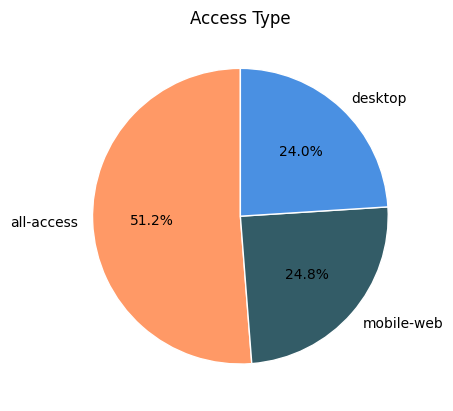

In [ ]:
counts = ad_ease['Access type'].value_counts(normalize=True)
label = counts.index
colors = ['#ff9966', '#335c67', '#4a90e2', '#fec85a', '#eb6e55']
plt.pie(
    counts, labels=label, autopct='%1.1f%%', startangle=90,colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Access Type')
plt.show()

**Insights**

*  51.2% of the pages correspond to the All access type (combined mobile + desktop).
*   Mobile (24.0%) and Desktop (24.8%) pages are almost equally distributed.  

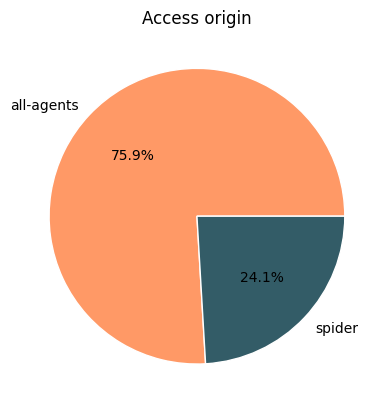

In [ ]:
counts = ad_ease['Access origin'].value_counts(normalize=True)
labels = counts.index
plt.pie(
    counts,labels=labels, autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Access Type')
plt.title('Access origin')
plt.show()

**Insights**

*  76% of the page views come from real people
*  24% of the page views come from robots (spiders)
*  Hence roughly 1 out of every 4 views is not a human.

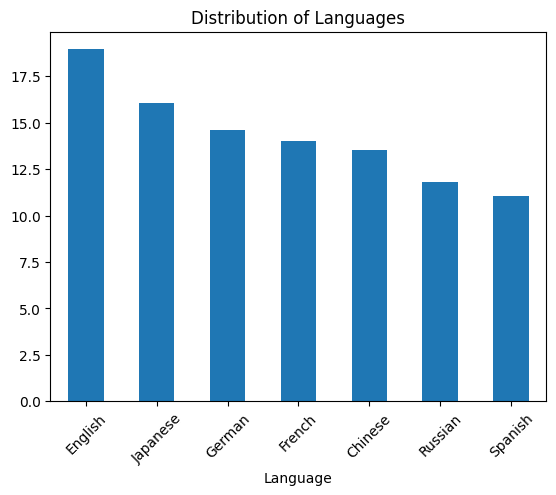

In [ ]:
(ad_ease['Language'].value_counts(normalize=True)*100).plot(kind='bar')
plt.title('Distribution of Languages')
plt.xticks(rotation=45)
plt.show()

**Insights**

*  English has the highest proportion, followed by Japanese. It doesn't mean that it significantly dominates other languages.

*  Spanish has the lowest proportion (11%), while French and Chinese are equally represented (14% each).

*  Overall, the language distribution is relatively balanced.

**Converting the dataframe**

In [ ]:
ad_ease = (
    ad_ease
    .drop(columns=['Page','Access type', 'Access origin'])
    .groupby('Language')
    .mean(numeric_only=True)
    .T
    .reset_index()
)

In [ ]:
ad_ease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Chinese   550 non-null    float64
 1   English   550 non-null    float64
 2   French    550 non-null    float64
 3   German    550 non-null    float64
 4   Japanese  550 non-null    float64
 5   Russian   550 non-null    float64
 6   Spanish   550 non-null    float64
dtypes: float64(7)
memory usage: 50.5+ KB


In [ ]:
ad_ease=ad_ease.rename(columns={'index':'Dates'})

ad_ease.head()

Language       Dates     Chinese      English      French      German  \
0         2015-07-01  306.174324  4120.242704  526.624206  801.433519   
1         2015-07-02  306.180041  4096.969675  530.038727  790.469330   
2         2015-07-03  304.711372  3863.318780  509.429958  758.689914   
3         2015-07-04  307.106882  4020.385549  544.347518  697.106317   
4         2015-07-05  326.373163  4157.757910  534.101778  809.890360   

Language    Japanese     Russian      Spanish  
0         637.635044  694.492845  1176.993529  
1         732.300645  706.667866  1125.926357  
2         661.188706  654.068973  1035.044477  
3         830.489442  615.880100   972.426566  
4         796.904439  655.269262  1056.349179

In [ ]:
ad_ease.describe().T

count         mean         std          min          25%  \
Language                                                             
Chinese   550.0   373.762059   50.486719   223.385802   343.107460   
English   550.0  4773.277263  926.906700  3650.296939  4216.631281   
French    550.0   682.065070  101.448543   427.841190   629.857434   
German    550.0   925.706275  112.642244   667.974445   847.295820   
Japanese  550.0   803.494624  120.453543   473.829493   720.002236   
Russian   550.0  1013.561912  386.701136   541.806463   848.708794   
Spanish   550.0  1275.664416  240.301473   672.224623  1093.836005   

                  50%          75%          max  
Language                                         
Chinese    373.966429   400.822340   737.616559  
English   4558.549069  5000.271195  8772.509464  
French     674.272255   728.886176  1156.117757  
German     908.339776   989.474275  1380.760830  
Japanese   796.961992   876.034761  1539.290782  
Russian    956.733553  1034.409207  3043.196515  
Spanish   1267.245057  1488.458207  2146.126518

**Insights**

*  This dataset contains **550 days** of data.

*  Among all the languages **English** has the highest average viewers.

In [ ]:
#Data type conversion
ad_ease['Dates']=pd.to_datetime(ad_ease['Dates'])

In [ ]:
ad_ease.isna().sum()

Language
Dates       0
Chinese     0
English     0
French      0
German      0
Japanese    0
Russian     0
Spanish     0
dtype: int64

There is no missing values. After aggregating and transposing the dataset, missing values at the page level are handled automatically.

In [ ]:
#Set Index
ad_ease=ad_ease.set_index('Dates')

**Anomaly detection**

In [ ]:
import plotly.express as px
fig=px.box(ad_ease)
fig.update_layout(
    width=1000,
    height=500
)
fig.show()


In [ ]:
ad_ease['English'].quantile(1)

np.float64(8772.509463722397)

In [ ]:
ad_ease['English'].quantile(0.99)

np.float64(8441.43509226029)

In [ ]:
ad_ease['Russian'].quantile(1)

np.float64(3043.19651520328)

In [ ]:
ad_ease['Russian'].quantile(0.99)

np.float64(2911.522740137281)

**Insights**

*  The average viewer counts for English and Russian show the presence of outliers, while the other languages do not exhibit significant outliers.

*  However, after examining their percentile values, outliers are not extremely different from the rest of the distribution. They are likely driven by campaigns or special events, particularly in English.

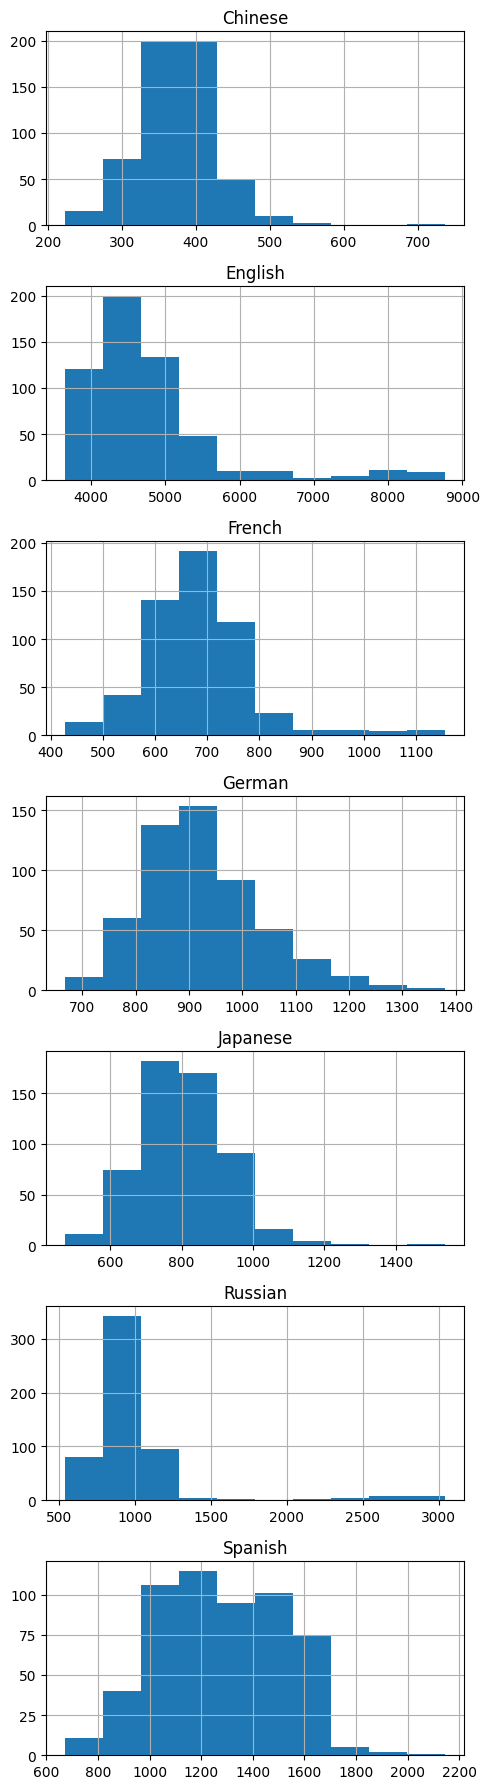

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(ad_ease.columns,1):
    plt.subplot(7,1,i)
    ad_ease[col].hist(figsize=(5,18))
    plt.title(col)
plt.tight_layout()

**Insights**

*  English and Russian have strong right-tail distribution, indicating the presence of extreme high viewer counts. These spikes are likely driven by external factors such as campaigns or special events.

*  Other languages distributions are relatively stable.

**Distribution of Exogenous Variable**

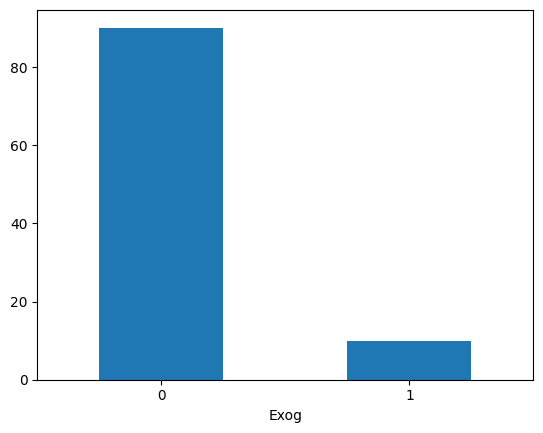

In [ ]:
x_var=exo['Exog'].value_counts(normalize=True)*100
x_var.plot(kind='bar')
plt.xticks(rotation=1)
plt.show()

*  Campaign or special-event days occur much less frequently than normal days.

**Temporal Distribution of Page Views**

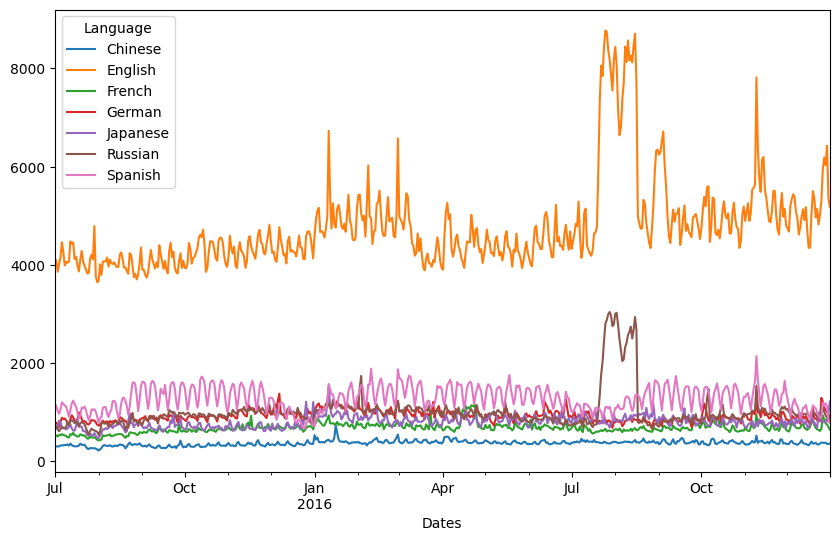

In [ ]:
ad_ease.plot(figsize=(10,6))
plt.show()

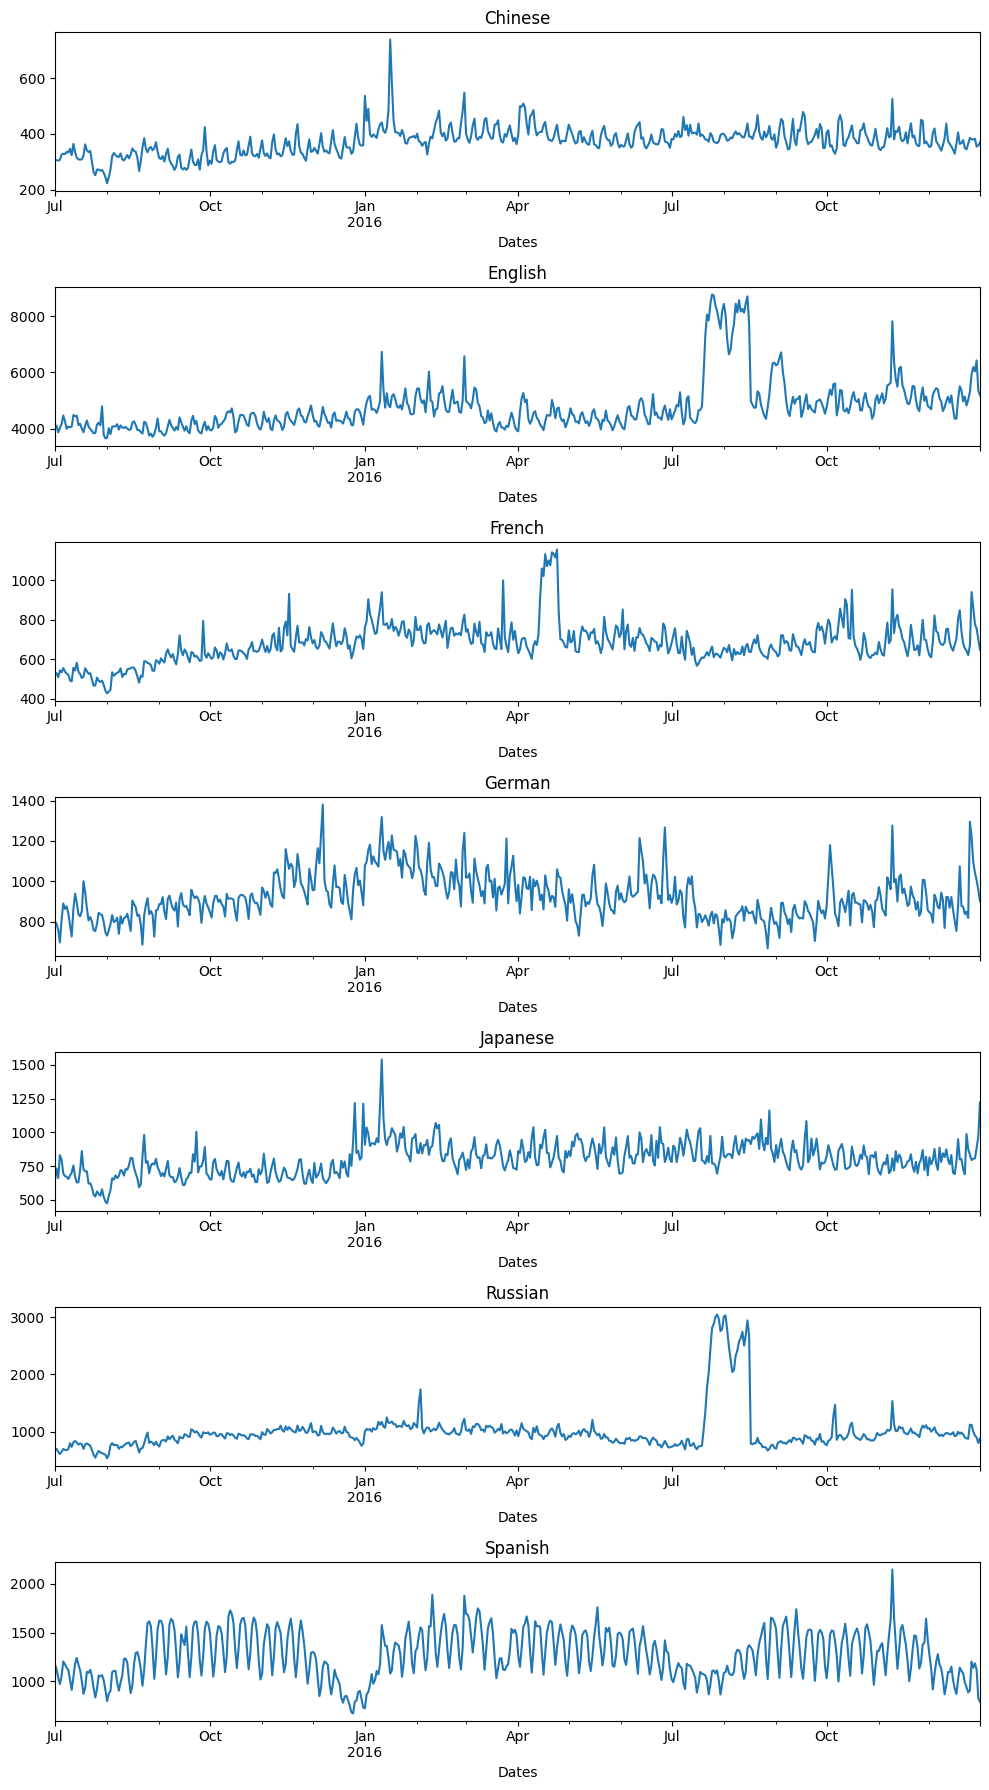

In [ ]:
plt.figure(figsize=(15,8))
for i, col in enumerate(ad_ease.columns,1):
    plt.subplot(7,1,i)
    ad_ease[col].plot(figsize=(10,18))
    plt.title(col)
plt.tight_layout()

**Insights**

*  While there is no clear upward or downward trend in average viewers across languages, the plot shows only minor day-to-day fluctuations rather than a perfectly horizontal line.

*  We can observe repetive patterns across all languages.

*  There is a significant spike in the average viewership of English and Russian Wikipedia pages. Interestingly, both languages show this spike in August, which may be due to a holiday or another seasonal event.

In [ ]:
ad_ease.index.is_monotonic_increasing

True

#**Decomposition of Time Seiries**

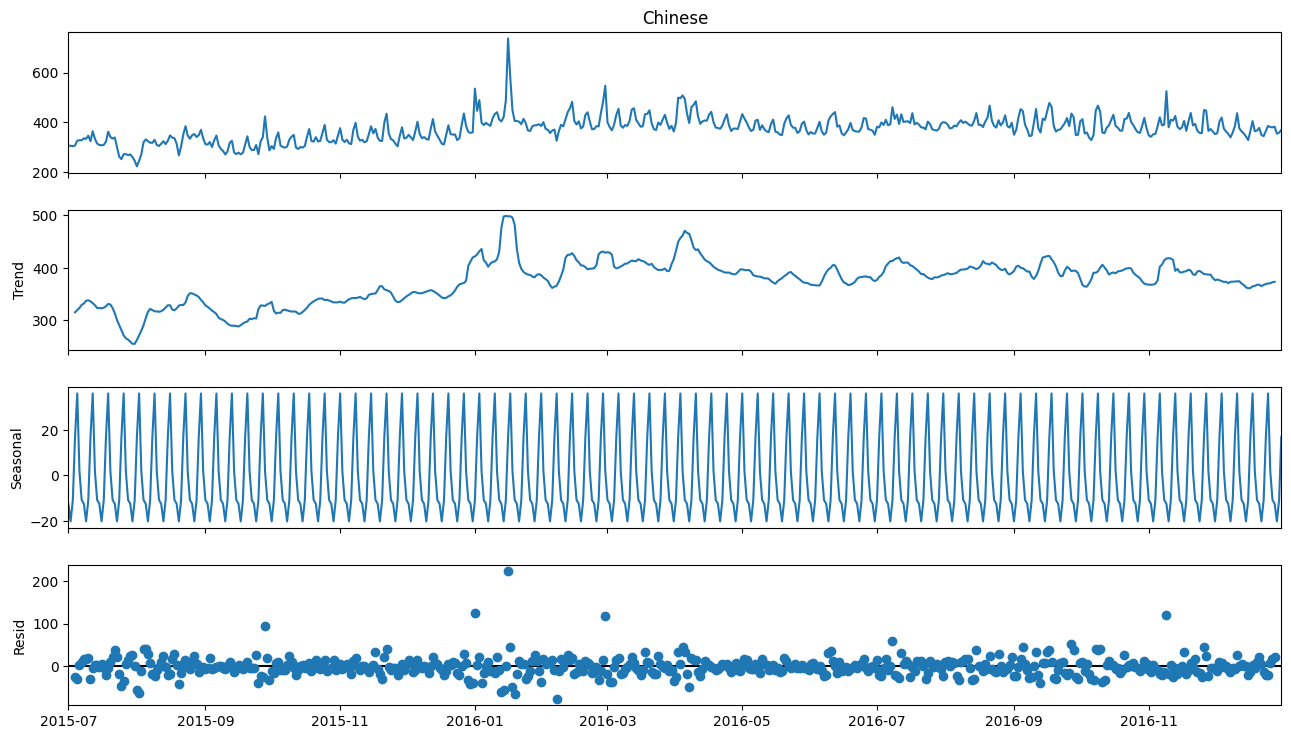

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ad_ease['Chinese'])
fig = decompose.plot()
fig.set_size_inches(14, 8)
plt.show()

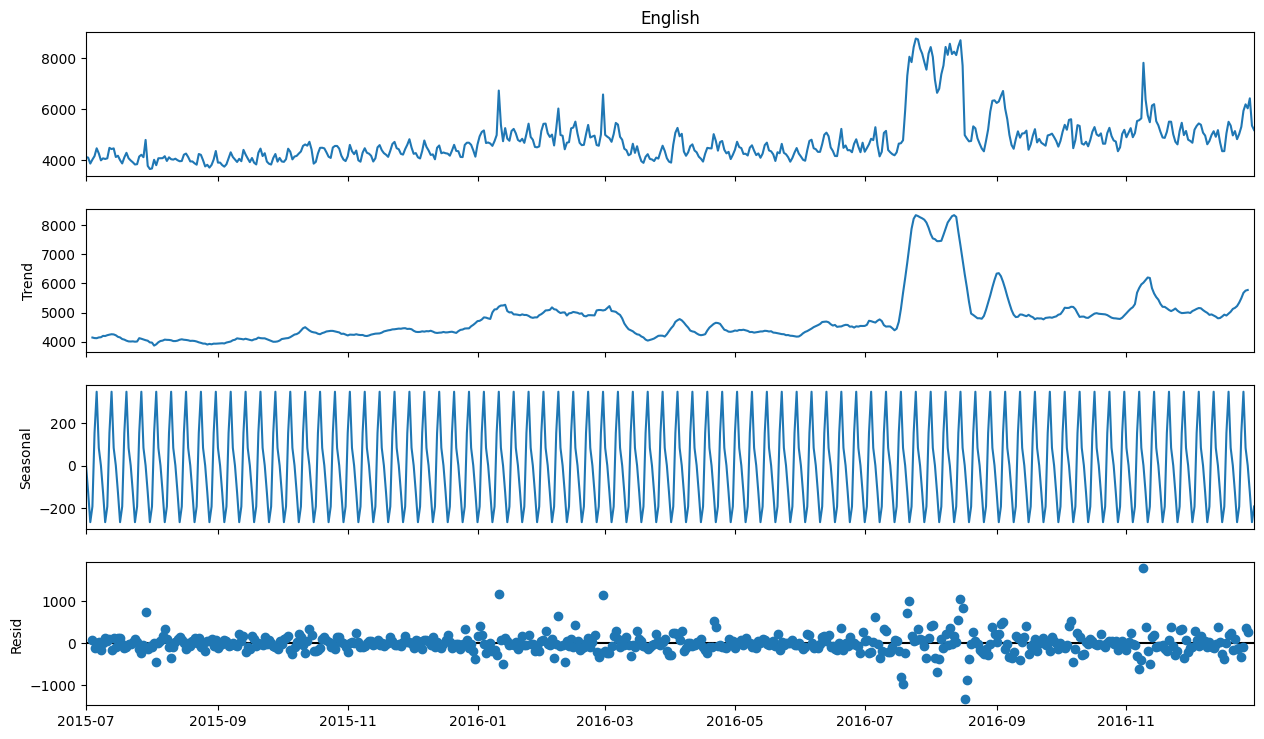

In [ ]:
decompose = seasonal_decompose(ad_ease['English'])
fig = decompose.plot()
fig.set_size_inches(14, 8)
plt.show()

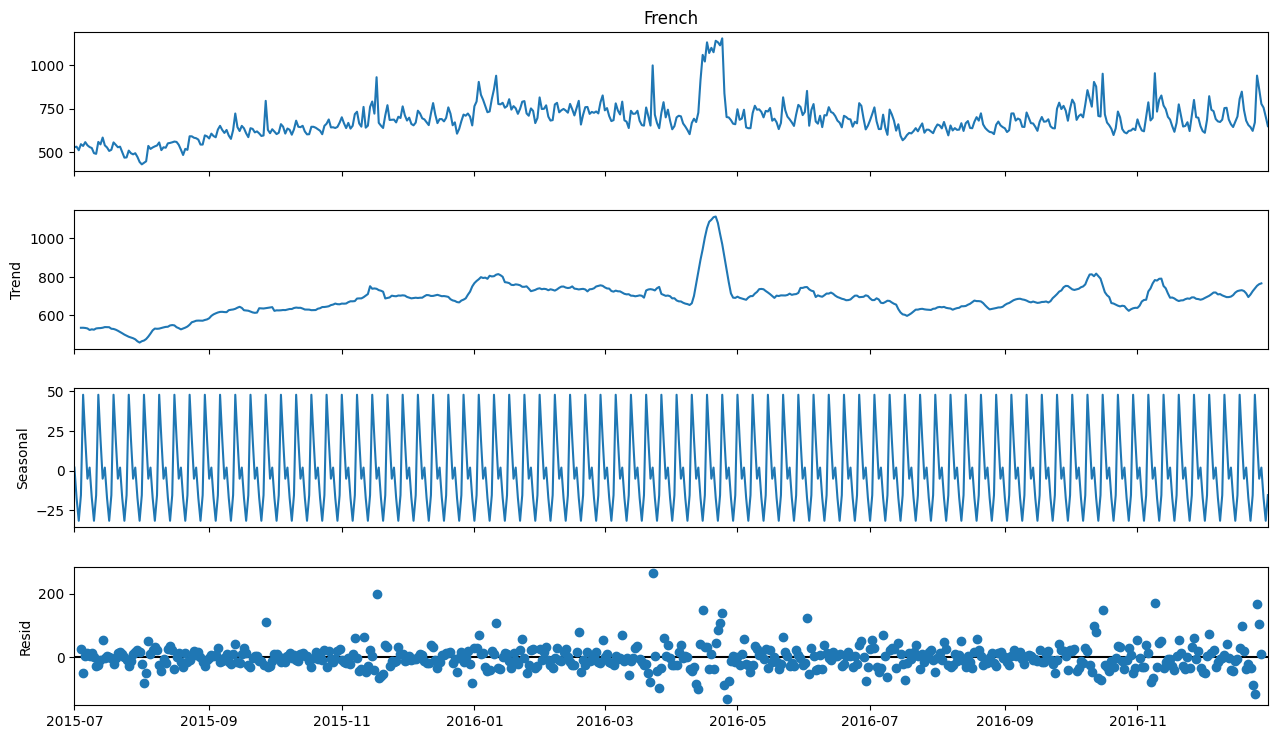

In [ ]:
decompose = seasonal_decompose(ad_ease['French'])
fig = decompose.plot()
fig.set_size_inches(14, 8)
plt.show()

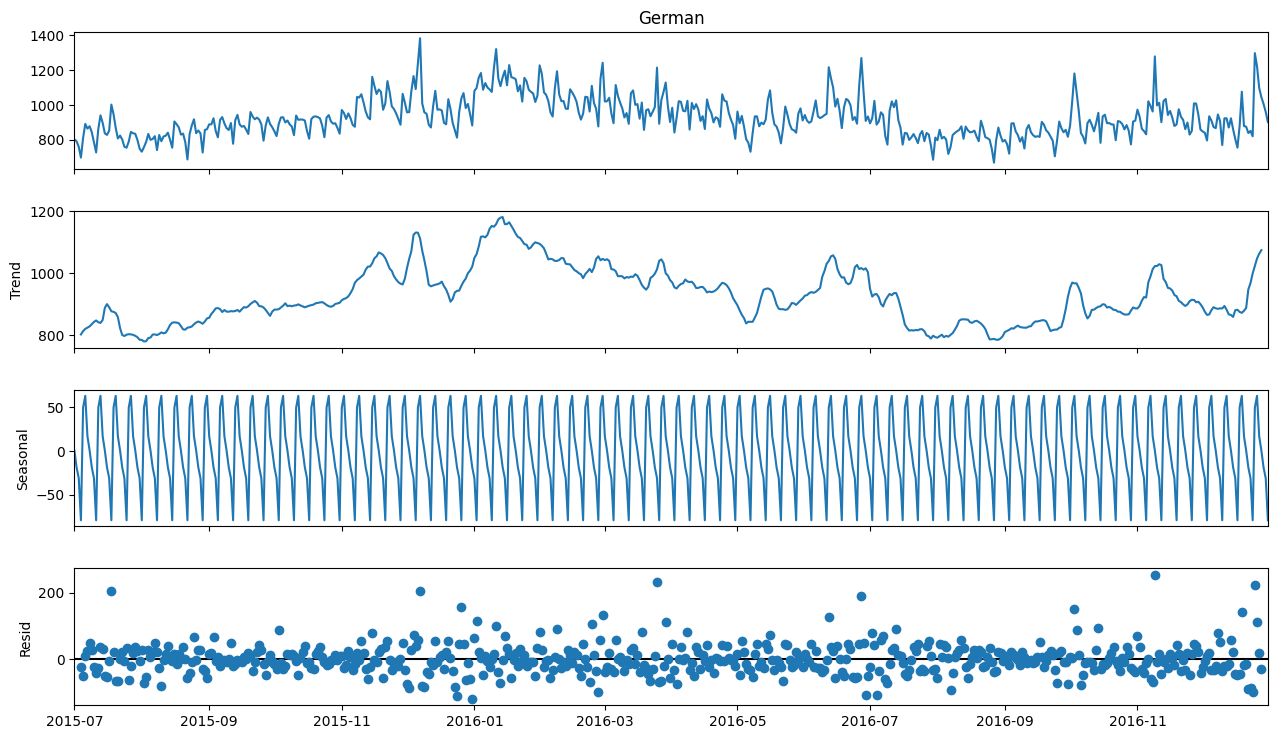

In [ ]:
decompose = seasonal_decompose(ad_ease['German'])
fig = decompose.plot()
fig.set_size_inches(14, 8)
plt.show()

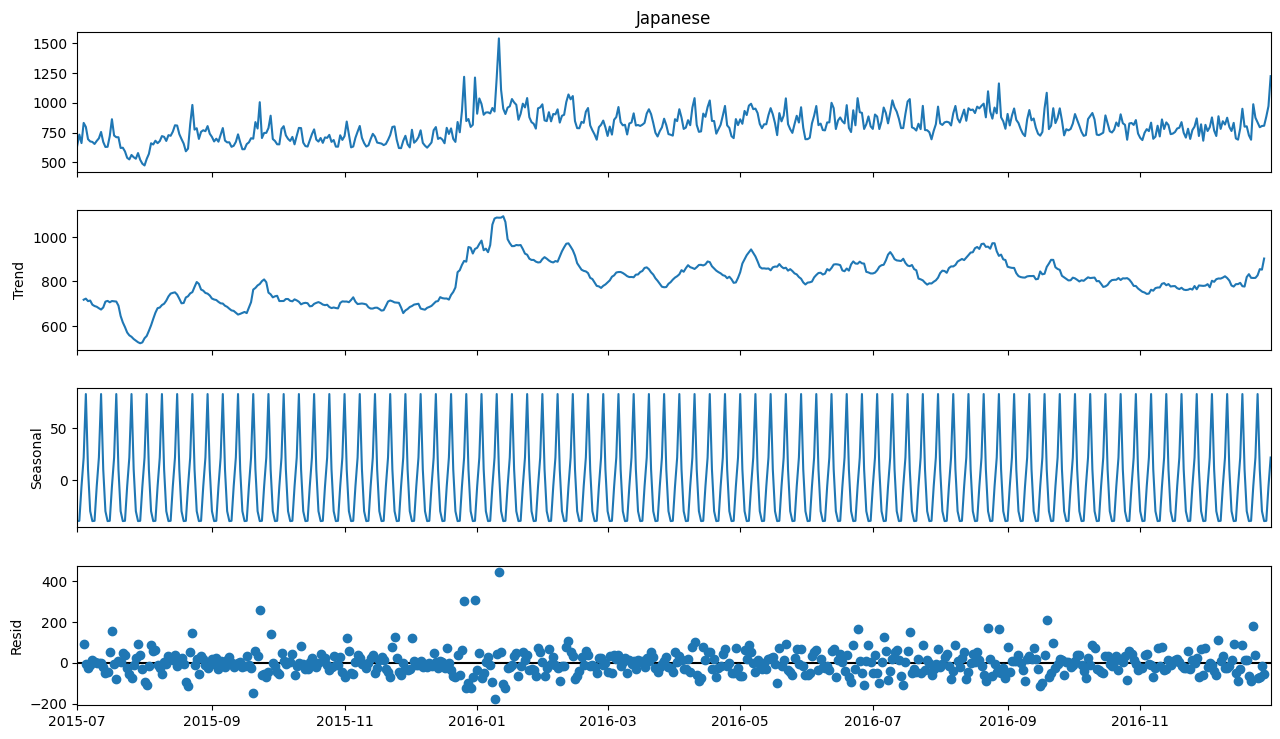

In [ ]:
decompose = seasonal_decompose(ad_ease['Japanese'])
fig = decompose.plot()
fig.set_size_inches(14, 8)
plt.show()

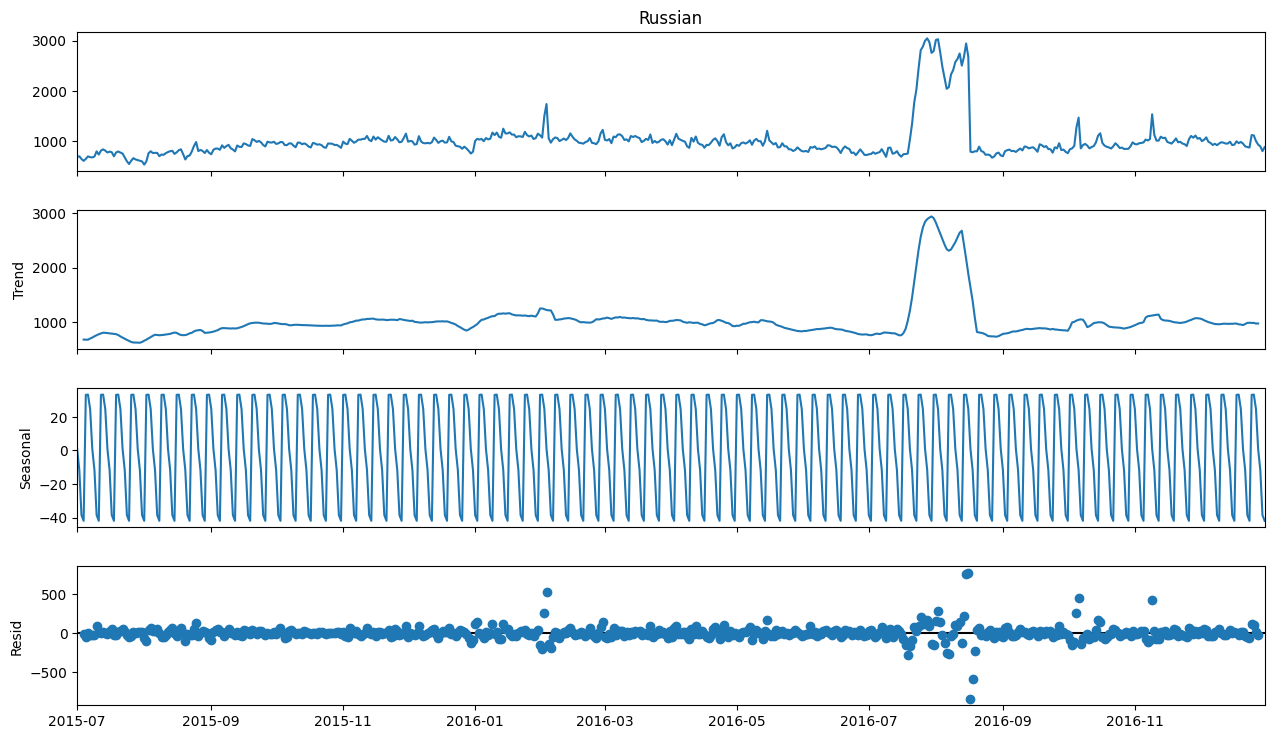

In [ ]:
decompose = seasonal_decompose(ad_ease['Russian'])
fig = decompose.plot()
fig.set_size_inches(14, 8)
plt.show()

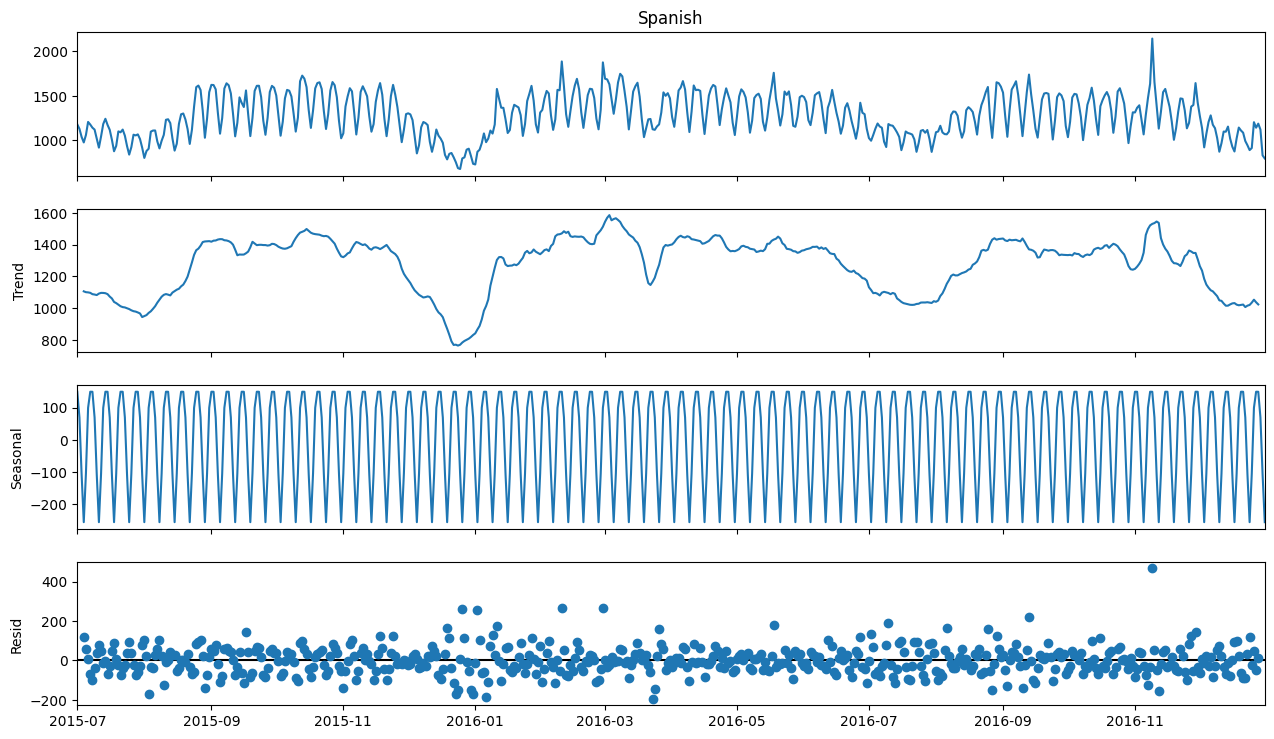

In [ ]:
decompose = seasonal_decompose(ad_ease['Spanish'])
fig = decompose.plot()
fig.set_size_inches(14, 8)
plt.show()

**Insights**

*  A strong and regular seasonal pattern is clearly visible in every  language.

*  **Chinese** Trend is slowly reducing over time. The residuals are more widely scattered in early 2016 compared to 2015.

*  **English** The trend increases gradually over the period and ends at a slightly higher level than it started, indicating a slow upward trend. The residuals show higher random fluctuations in 2016, whereas the series appears more stable during **2015**.

*  **French** Increasing trend with inconsistant noise over time.

*  **German** Increasing trend with daily fluctuations.

*  **Japanese** Increasing trend with minior fluctuations reflected in noise.

*  **Russian** Decreasing trend with consistant noise.

*  **Spanish** Decreasing trend fluctuating over time, while the residual component shows the presence of noise and random fluctuations across days.

#**Stationarity Check**

**Augmented Dickey-Fuller (ADF) test**

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):

  for col in dataset.columns:
    series = ad_ease[col]
    pval = adfuller(series)[1]
    stationary = "Stationary" if pval < 0.05 else "Non-stationary"
    print(f"{col}\n  p-value: {pval:.03f} → {stationary}\n")
    #results.append({'column': col, 'pval': pval, 'stationary': stationary})


adf_test(ad_ease)

Chinese
  p-value: 0.218 → Non-stationary

English
  p-value: 0.106 → Non-stationary

French
  p-value: 0.027 → Stationary

German
  p-value: 0.120 → Non-stationary

Japanese
  p-value: 0.048 → Stationary

Russian
  p-value: 0.002 → Stationary

Spanish
  p-value: 0.033 → Stationary



#**Detrending or differencing**

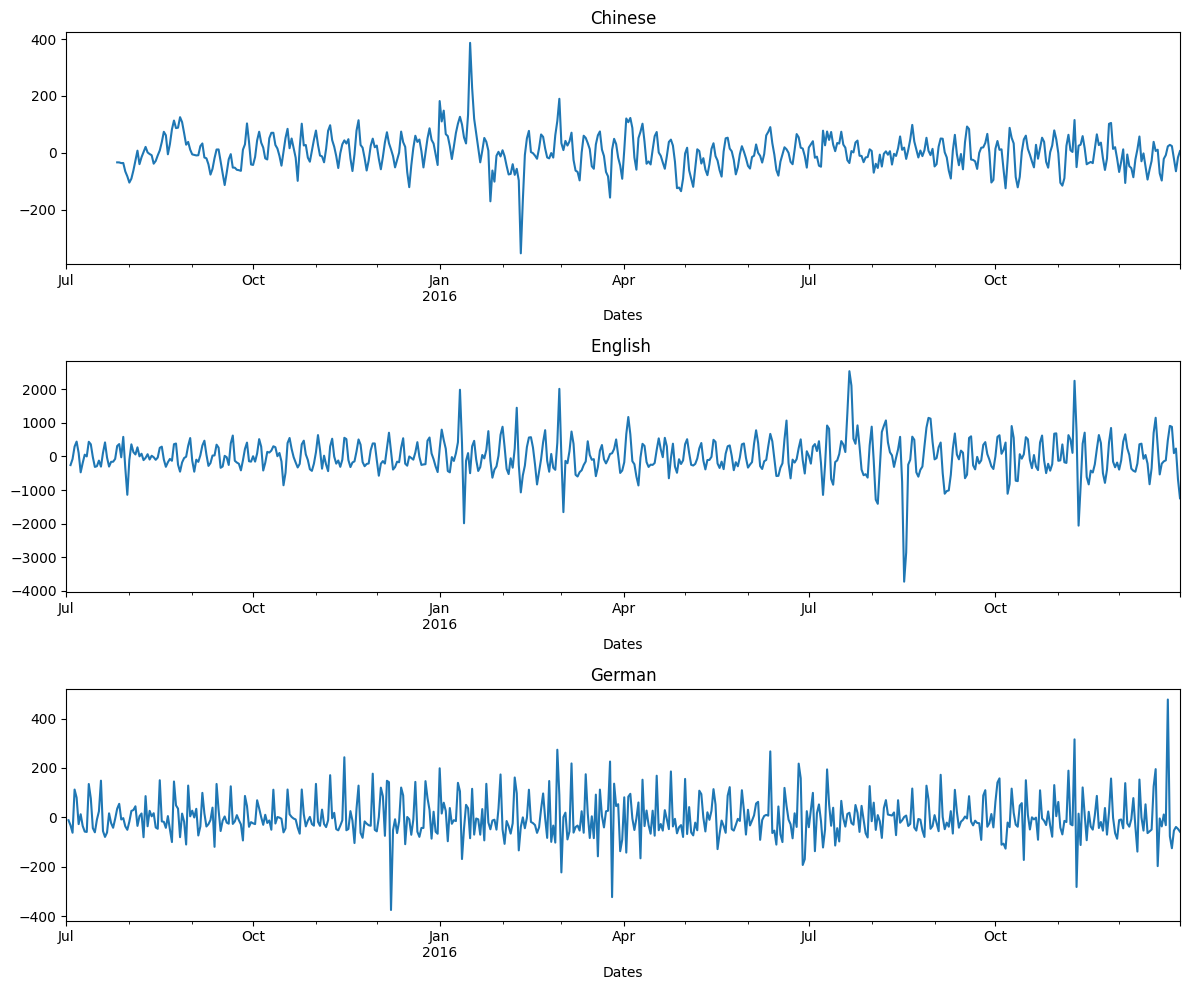

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
ad_ease['Chinese'].diff(25).plot()
plt.title("Chinese")

plt.subplot(3,1,2)
ad_ease['English'].diff(2).plot()
plt.title("English ")

plt.subplot(3,1,3)
ad_ease['German'].diff(1).plot()
plt.title("German")
plt.tight_layout()
plt.show()


#**ACF and PACF**

**Without Differencing**

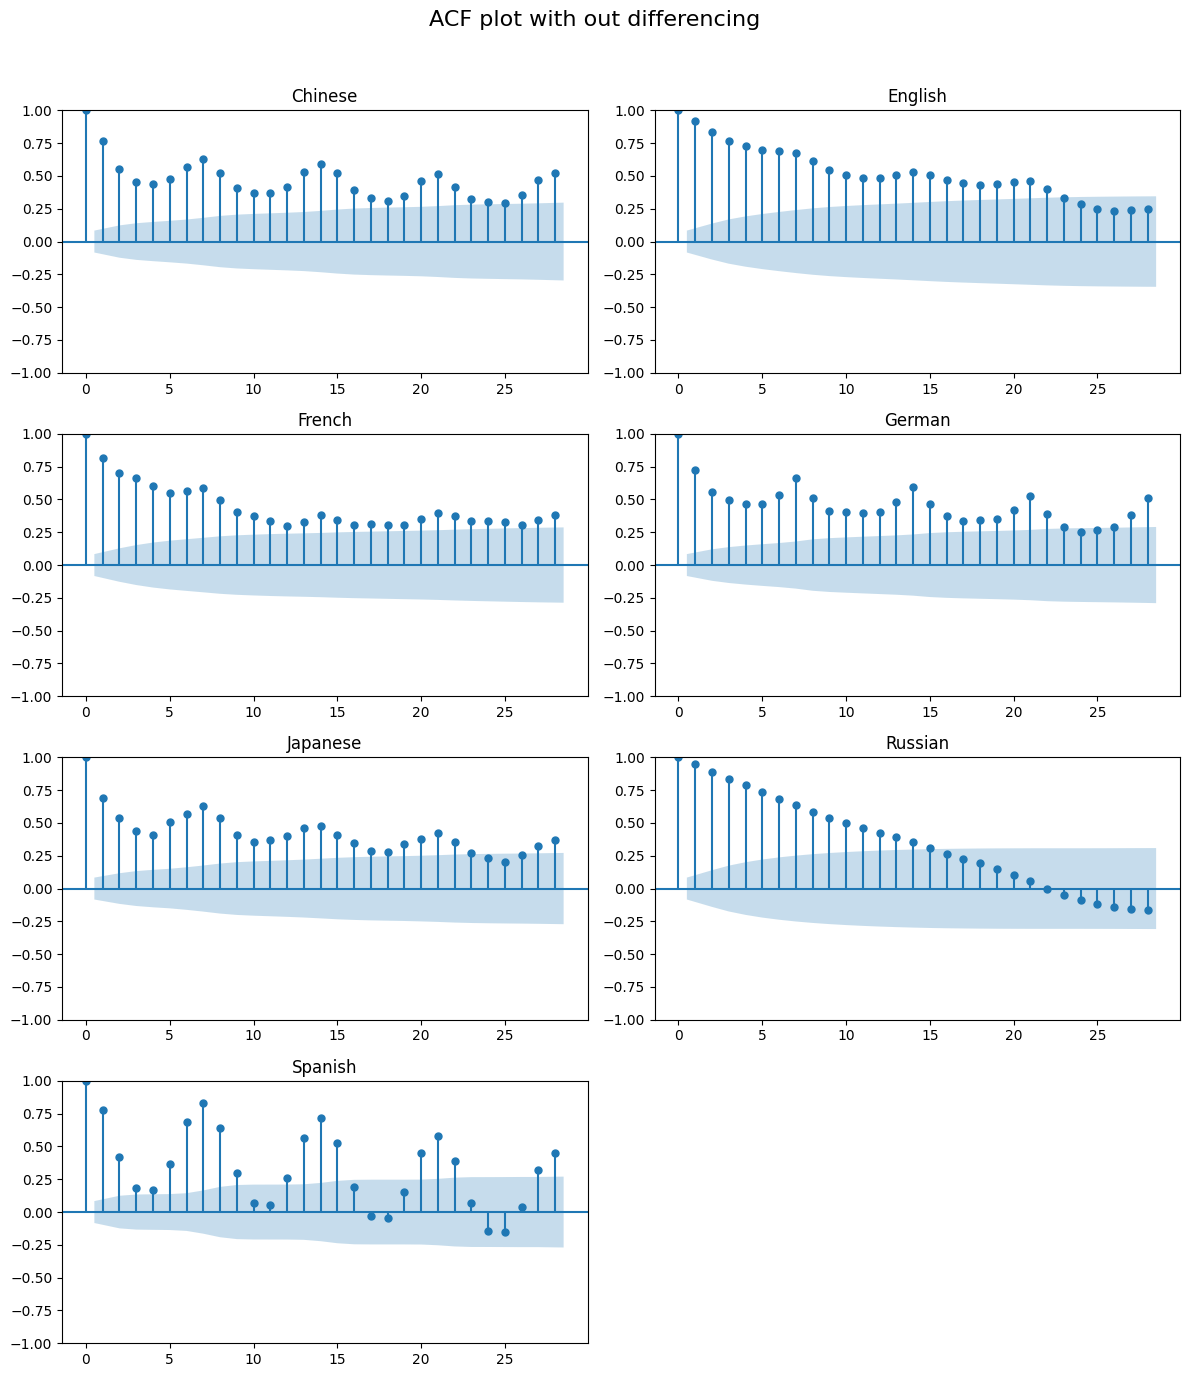

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig = plt.figure(figsize=(12, 14))
plt.suptitle("ACF plot with out differencing", fontsize=16)
for i,col in enumerate(ad_ease.columns,1):
  plt.subplot(4,2,i)
  plot_acf(ad_ease[col], ax=plt.gca())
  plt.title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**PACF**

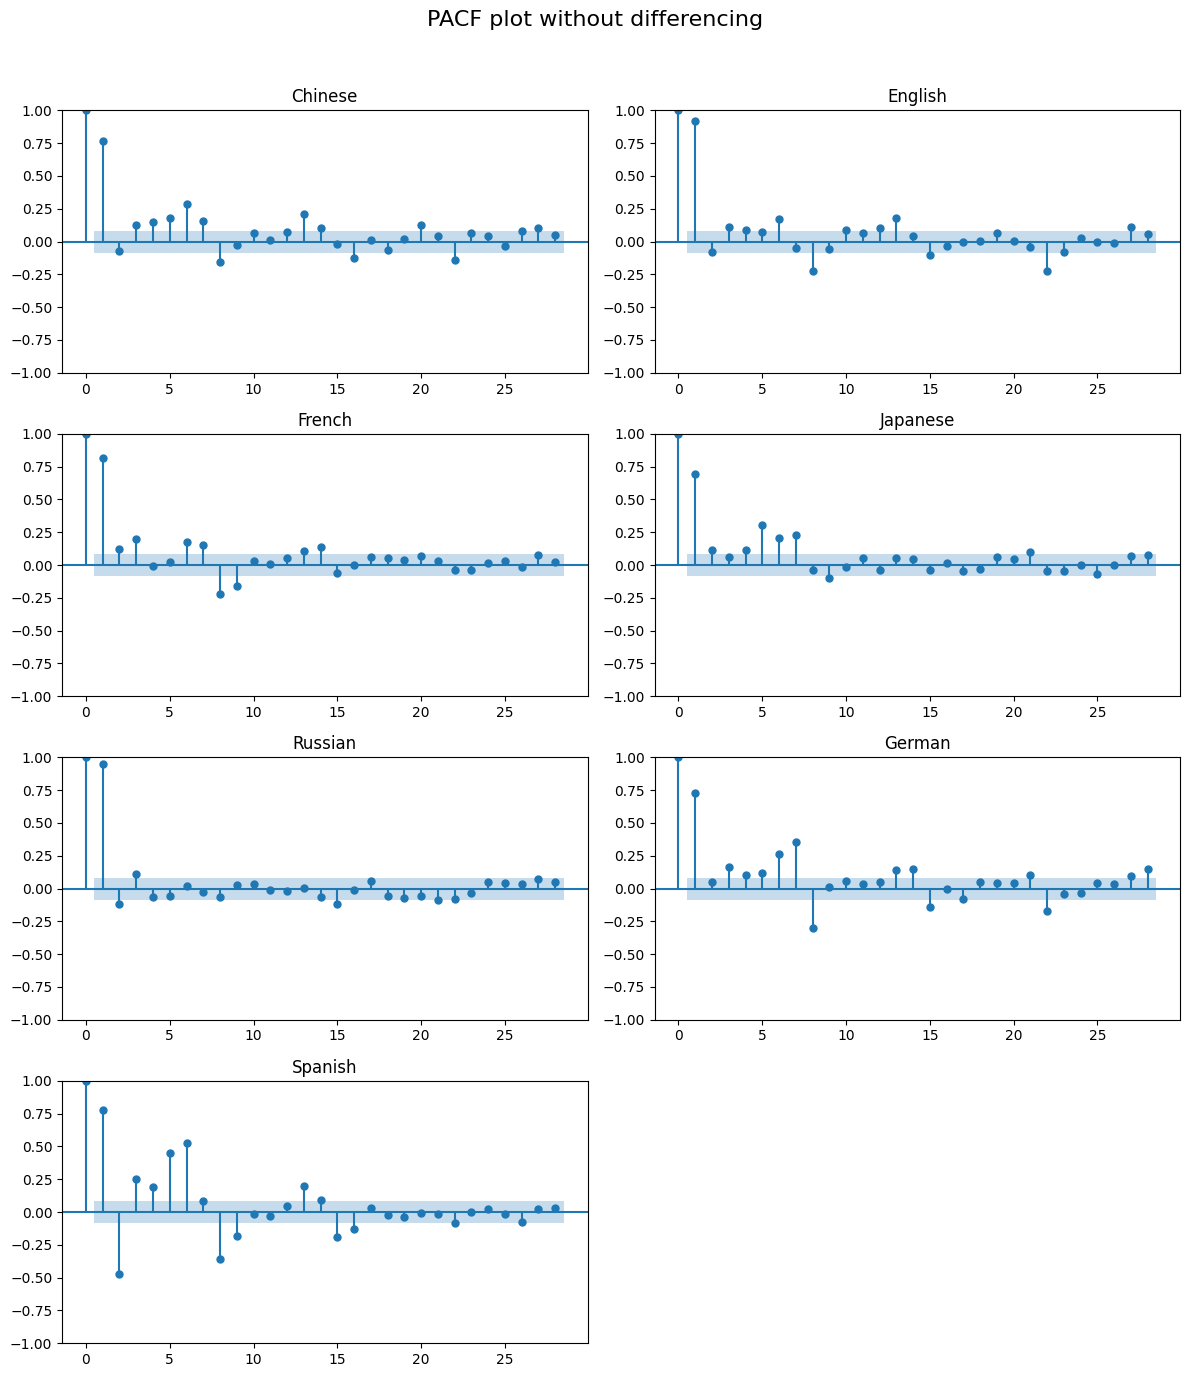

In [ ]:
fig = plt.figure(figsize=(12, 14))
plt.suptitle("PACF plot without differencing", fontsize=16)
non_diff = ['Chinese', 'English', 'French', 'Japanese', 'Russian', 'German', 'Spanish']
for i,col in enumerate(non_diff,1):
  plt.subplot(4,2,i)
  plot_pacf(ad_ease[col], ax=plt.gca())
  plt.title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**With Differencing**

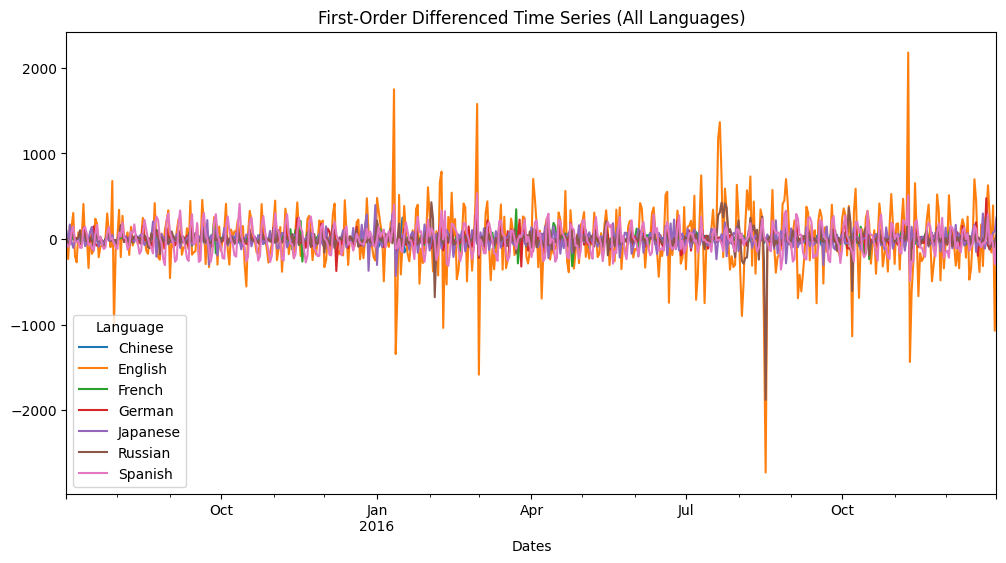

In [ ]:
diff_series = ad_ease.diff(1).dropna()

fig, ax = plt.subplots(figsize=(12,6))
diff_series.plot(ax=ax)
ax.set_title("First-Order Differenced Time Series (All Languages)")

plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):

  for col in dataset.columns:
    series = diff_series[col]
    pval = adfuller(series)[1]
    stationary = "Stationary" if pval < 0.05 else "Non-stationary"
    print(f"{col}\n  p-value: {pval:.03f} → {stationary}\n")
    #results.append({'column': col, 'pval': pval, 'stationary': stationary})


adf_test(diff_series)

Chinese
  p-value: 0.000 → Stationary

English
  p-value: 0.000 → Stationary

French
  p-value: 0.000 → Stationary

German
  p-value: 0.000 → Stationary

Japanese
  p-value: 0.000 → Stationary

Russian
  p-value: 0.000 → Stationary

Spanish
  p-value: 0.000 → Stationary



**ACF**

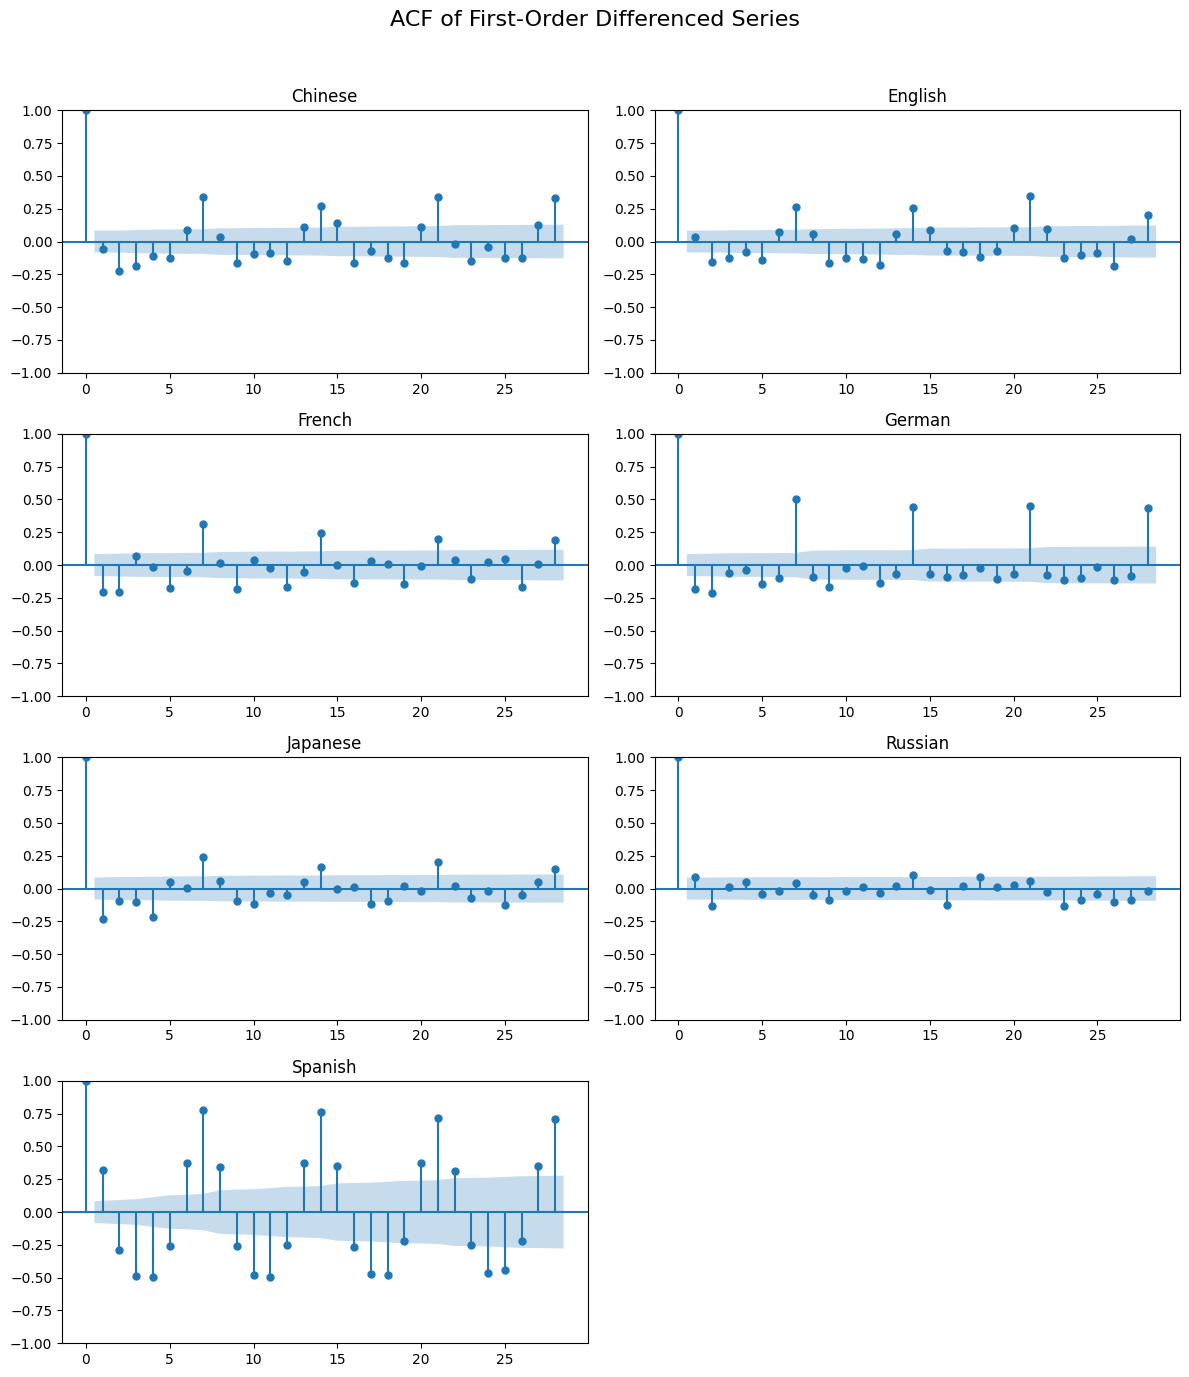

In [ ]:
fig = plt.figure(figsize=(12, 14))
plt.suptitle('ACF of First-Order Differenced Series', fontsize=16)
for i,col in enumerate(diff_series.columns,1):
  plt.subplot(4,2,i)
  plot_acf(diff_series[col], ax=plt.gca())
  plt.title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**PACF**

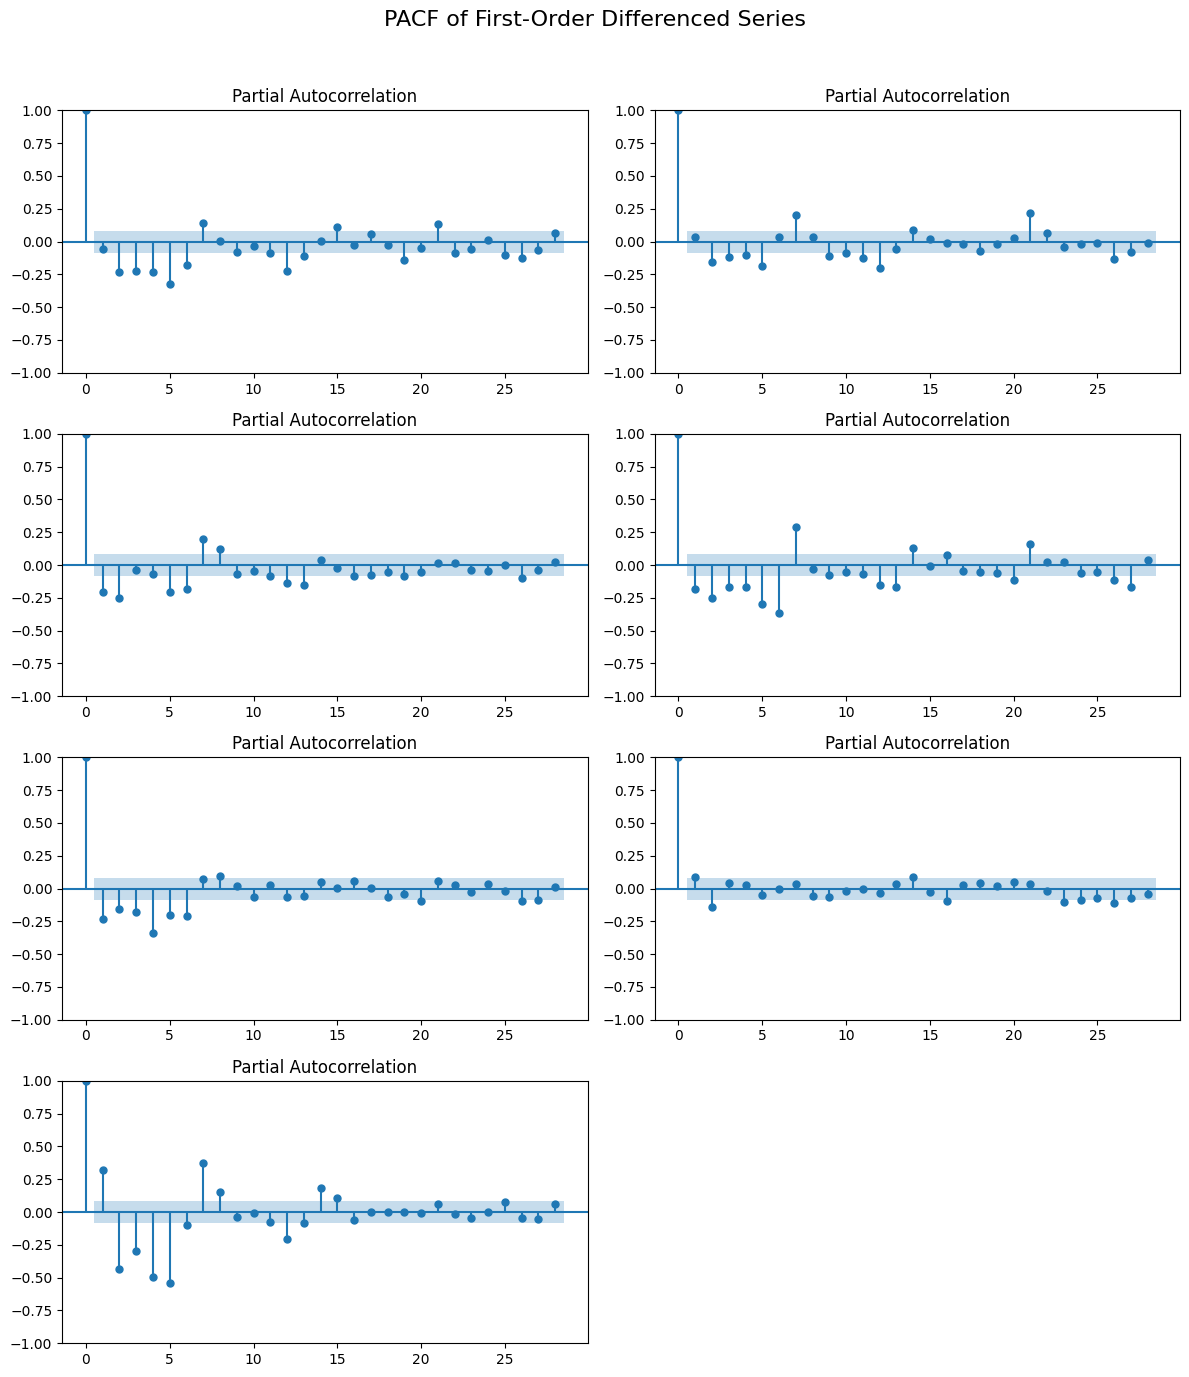

In [ ]:
fig = plt.figure(figsize=(12, 14))
plt.suptitle('PACF of First-Order Differenced Series', fontsize=16)
for i,col in enumerate(diff_series.columns,1):
  plt.subplot(4,2,i)
  plot_pacf(diff_series[col], ax=plt.gca())
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#Model Building

#ARIMA Model

**Model 1**

In [ ]:
#Data split
train = ad_ease.iloc[:520]
test = ad_ease.iloc[520:]

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: Conver

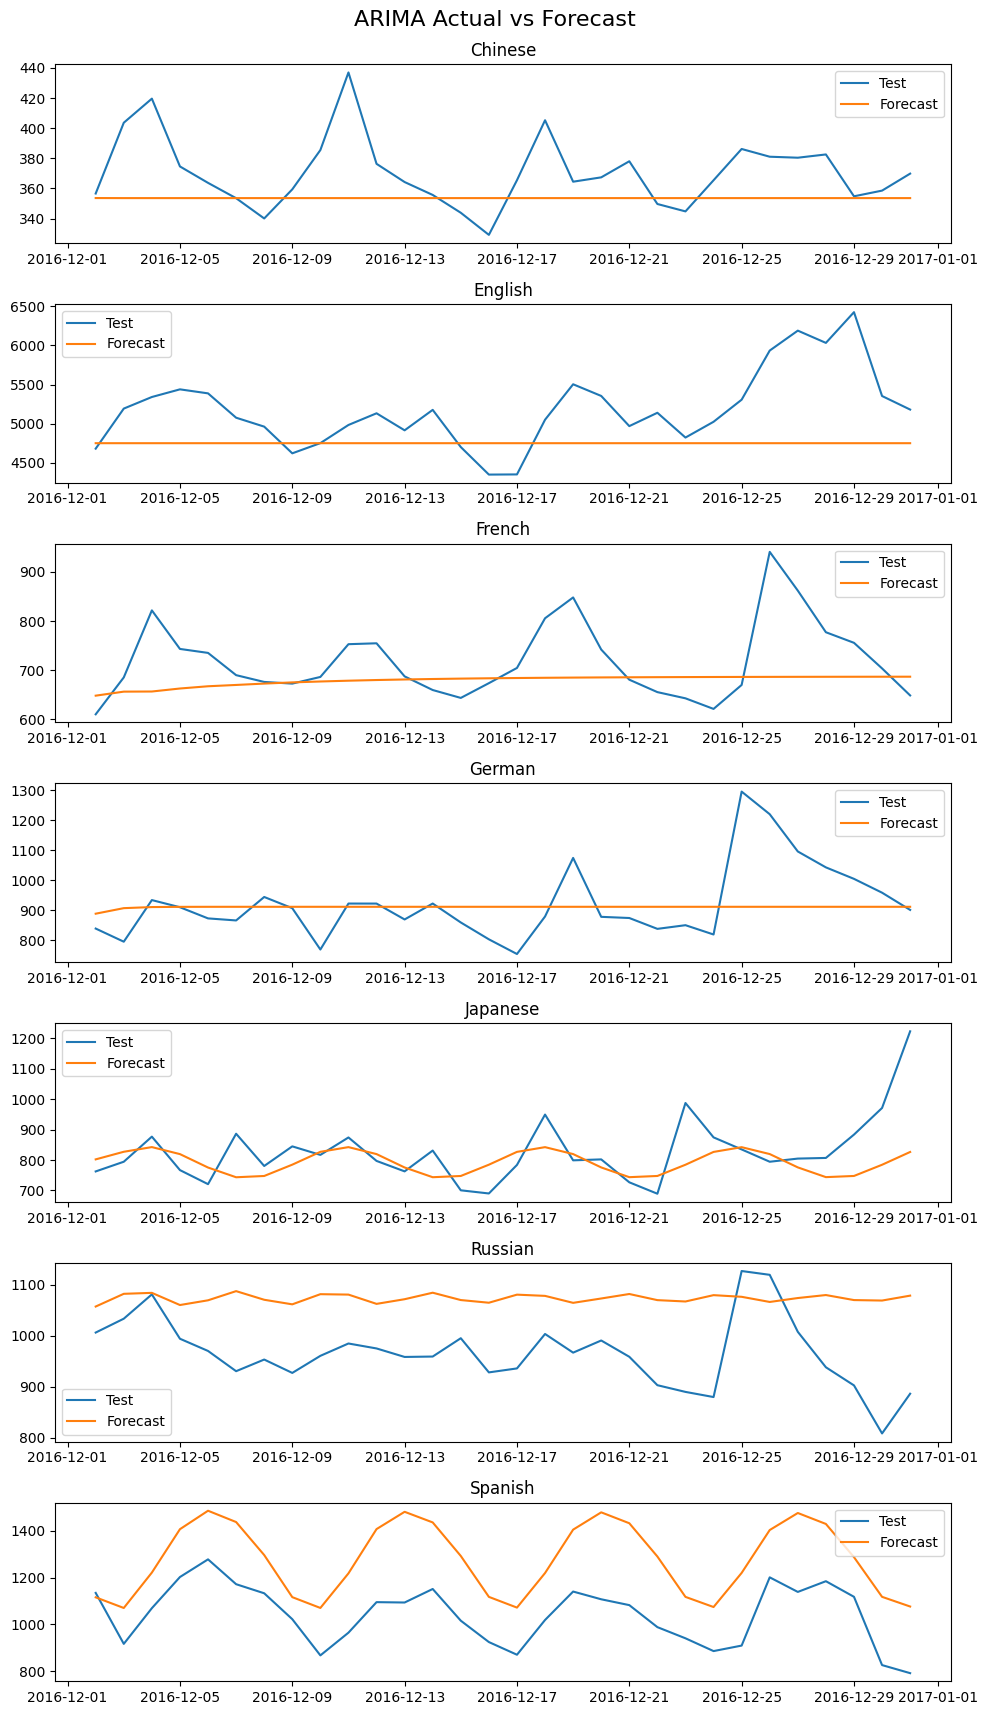

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning

warnings.filterwarnings("ignore", category=ValueWarning)
orders = {
    'Chinese':(1, 1, 0),
    'English': (1, 1, 0),
    'French': (3, 1, 2),
    'German':  (1, 1, 2),
    'Japanese': (2, 1, 4),
    'Russian': (3, 1, 2),
    'Spanish': (6, 0, 9)}

plt.figure(figsize=(10, 18))
plt.suptitle('ARIMA Actual vs Forecast', fontsize=16,  y=0.95)

forecast_arima = {}
for i, lang in enumerate(orders.keys(), 1):
    plt.subplot(7, 1, i)

     # Fit model with language-specific order
    model = SARIMAX(train[lang], order=orders[lang])
    model_fit = model.fit()

    forecast_arima[lang] = model_fit.forecast(steps=len(test))

    #plt.plot(train.index, train[lang], label='Train')
    plt.plot(test.index, test[lang], label='Test')
    plt.plot(test.index, forecast_arima[lang], label='Forecast')

    plt.title(f'{lang}')
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Interpretation**

*  **ARIMA** makes a **flat forecast** which are well aligned with the actual time series.

*  The forecasted time series for **Russian and Spanish** are overpredicted, because the real trend is going down.

*  **Spanish** shows is a strong repeating up and down pattern for roughly every **3-4 days.**

**Evaluation**

In [ ]:
from sklearn.metrics import(
mean_absolute_error as mae,
mean_absolute_percentage_error as mape,
mean_squared_error as mse)
results =[]
for lang in test.columns:
  actual = test[lang].values
  pred = forecast_arima[lang].values
  mae_arima = mae(actual, pred)
  mse_arima = mse(actual, pred)
  mape_arima = mape(actual, pred)
  rsme = np.sqrt(mse(actual, pred))
  results.append(mape_arima)
  results.append(mae_arima)
  results.append(rsme)
  print(
    f' {lang}  \n mae --- {mae_arima:0.2f} \n MAPE --- {mape_arima:0.2f}  \n rsme -- {rsme:0.2f} \n'
      )

 Chinese  
 mae --- 21.00 
 MAPE --- 0.05  
 rsme -- 28.60 

 English  
 mae --- 497.61 
 MAPE --- 0.09  
 rsme -- 643.03 

 French  
 mae --- 60.27 
 MAPE --- 0.08  
 rsme -- 85.02 

 German  
 mae --- 83.23 
 MAPE --- 0.09  
 rsme -- 120.46 

 Japanese  
 mae --- 70.70 
 MAPE --- 0.08  
 rsme -- 105.25 

 Russian  
 mae --- 114.33 
 MAPE --- 0.12  
 rsme -- 126.49 

 Spanish  
 mae --- 235.70 
 MAPE --- 0.23  
 rsme -- 249.24 



**Interpretaion**

*  **Chinese, English, French, German, Japanese**  → Model is performing well. Low MAE, low MAPE, and reasonable RMSE indicate predictions are close to actuals.

*  **Russian and Spanish** → MAPE > 0.1 (especially Spanish at 0.23) → relatively higher percentage errors. RMSE is also higher. This shows the model struggles with these languages.

*  However, to further evaluate whether a better combination of parameters can reduce the error, we proceed with hyperparameter tuning using grid search.

**Grid search**

In [ ]:
# Parameter ranges
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)
pdq = list(itertools.product(p,d,q))

results = {}

languages = ['Chinese', 'English', 'French', 'German', 'Japanese', 'Russian', 'Spanish']

for lang in languages:
    print(f"Tuning ARIMA for {lang}...")
    train_series = ad_ease[lang].iloc[:-30]
    test_series  = ad_ease[lang].iloc[-30:]

    best_aic = float("inf")
    best_order = None

    # Grid search
    for order in pdq:
        try:
            model = SARIMAX(train_series, order=order)
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = order
        except:
            continue

    # Fit best model
    best_model = SARIMAX(train_series, order=best_order).fit()
    forecast = best_model.forecast(steps=len(test_series))

    # Calculate MAPE (avoid zeros)
    mask = test_series != 0
    mape = np.mean(np.abs((test_series[mask] - forecast[mask]) / test_series[mask])) * 100

    # Save results
    results[lang] = {'best_order': best_order, 'AIC': best_aic, 'MAPE': mape}

print("\nResults for all languages:")
for lang, res in results.items():
    print(f"{lang}: Order={res['best_order']}, AIC={res['AIC']:.2f}, MAPE={res['MAPE']:.2f}%")

Tuning ARIMA for Chinese...
Tuning ARIMA for English...
Tuning ARIMA for French...
Tuning ARIMA for German...
Tuning ARIMA for Japanese...
Tuning ARIMA for Russian...
Tuning ARIMA for Spanish...

Results for all languages:
Chinese: Order=(3, 1, 3), AIC=4974.92, MAPE=6.02%
English: Order=(2, 1, 3), AIC=7539.99, MAPE=6.27%
French: Order=(3, 1, 3), AIC=5609.65, MAPE=8.06%
German: Order=(3, 1, 3), AIC=5849.40, MAPE=7.64%
Japanese: Order=(3, 1, 3), AIC=5967.42, MAPE=7.91%
Russian: Order=(2, 1, 3), AIC=6491.92, MAPE=12.35%
Spanish: Order=(2, 1, 3), AIC=6224.09, MAPE=24.50%


**ARIMA Model with Grid Search Parameters**

In [ ]:
orders = {
    'Chinese':(3, 1, 3),
    'English': (2, 1, 3),
    'French': (3, 1, 3),
    'German':  (3, 1, 3),
    'Japanese': (3, 1, 3),
    'Russian': (2, 1, 3),
    'Spanish': (2, 1, 3)}
forecast_grid = {}
for i, lang in enumerate(orders.keys(), 1):
   model1 = SARIMAX(train[lang], order=orders[lang])
   model_fit1 = model1.fit()

   forecast_grid[lang] = model_fit1.forecast(steps=len(test))

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: Conver

In [ ]:
results = []

for lang in test.columns:
    actual = test[lang].values
    pred = forecast_grid[lang].values

    mape_grid = mean_absolute_percentage_error(actual, pred)

    results.append({
        'Language': lang,
        'MAPE': mape_grid
    })

    print(f'{lang}: MAPE --- {mape_grid:.3f}')

Chinese: MAPE --- 0.060
English: MAPE --- 0.063
French: MAPE --- 0.081
German: MAPE --- 0.076
Japanese: MAPE --- 0.079
Russian: MAPE --- 0.124
Spanish: MAPE --- 0.245


In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 29.2 MB/s eta 0:00:00


**ARIMA Modeling with Auto Selection**

In [ ]:
from pmdarima import auto_arima

for lang in train.columns:
    stepwise_model = auto_arima(train[lang],
                                start_p=0, max_p=10,
                                start_q=0, max_q=10,
                                seasonal=False,
                                d=None,
                                trace=True,
                                error_action='ignore',
                                suppress_warnings=True,
                                stepwise=True)
    print(f'{lang}: best order = {stepwise_model.order}')

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5165.531, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5165.760, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5163.981, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5163.534, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5065.282, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5043.928, Time=0.47 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5140.394, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5043.831, Time=0.73 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5114.756, Time=0.33 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5044.587, Time=0.95 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5045.615, Time=1.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5044.058, Time=0.86 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=5088.885, Time=0.95 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5033.588, Time=3.59 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept

**Auto ARIMA Model**

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


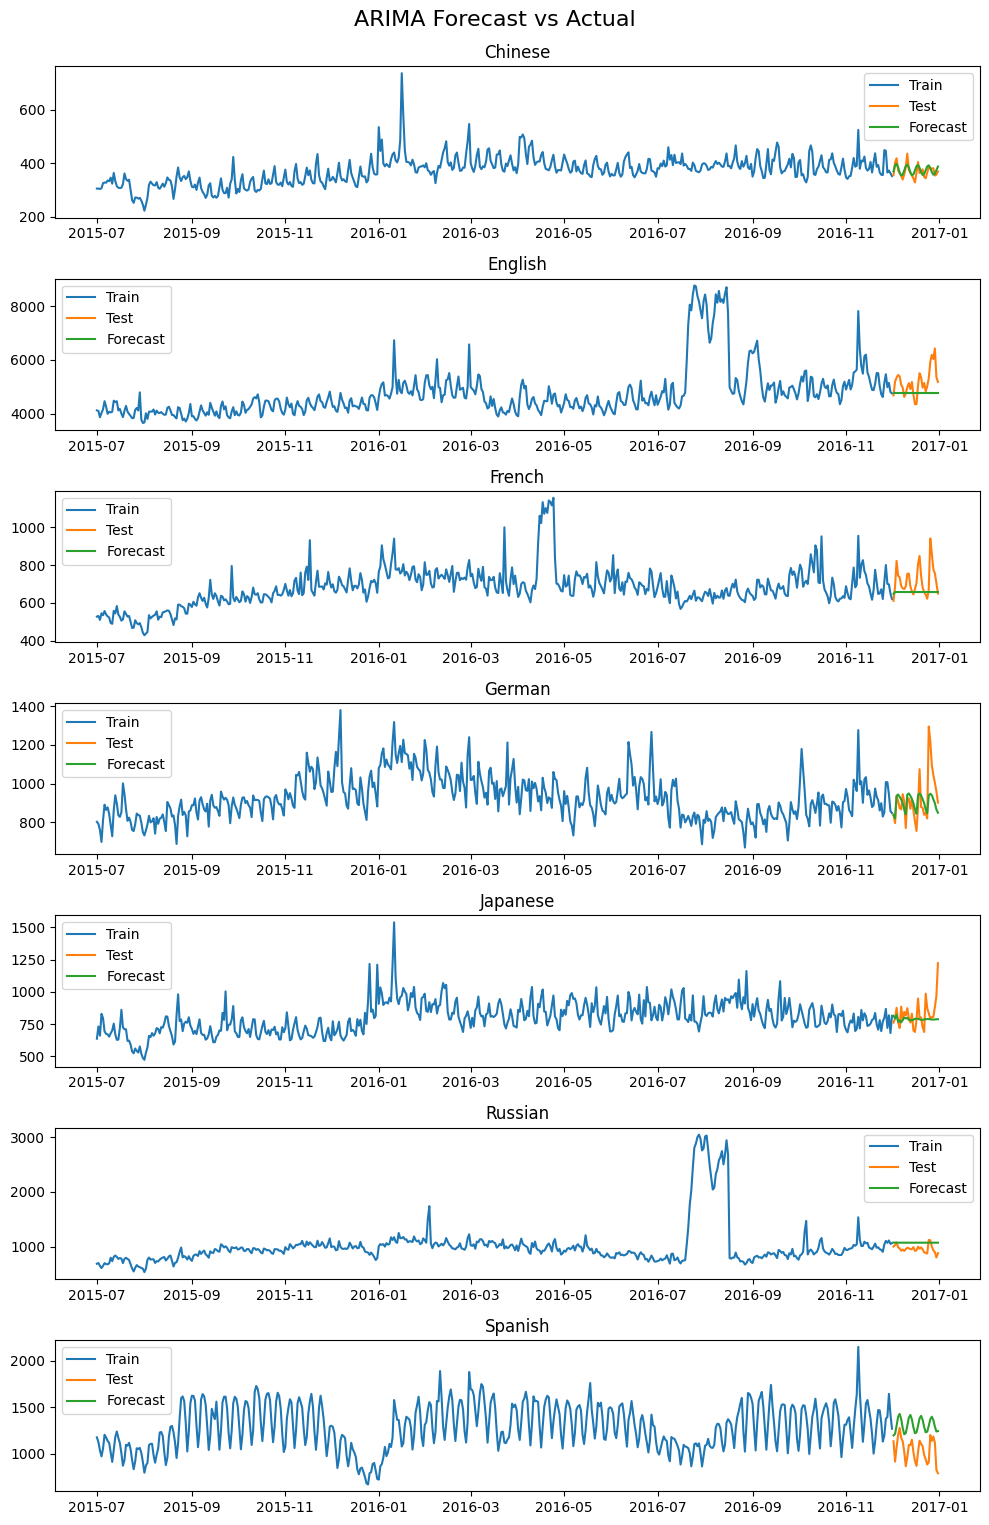

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning

warnings.filterwarnings("ignore", category=ValueWarning)
orders = {
    'Chinese':(5, 1, 2),
    'English': (0, 1, 0),
    'French': (0, 1, 2),
    'German':  (7, 1, 7),
    'Japanese': (6, 1, 0),
    'Russian': (2, 1, 0),
    'Spanish': (2, 1, 2)}
plt.figure(figsize=(10, 16))
plt.suptitle('ARIMA Forecast vs Actual', fontsize=16, y=0.95)
forecast_auto ={}
for i, lang in enumerate(orders.keys(), 1):
    plt.subplot(7, 1, i)

     # Fit model with language-specific order
    model2 = ARIMA(train[lang], order=orders[lang])
    model_fit2 = model2.fit()

    forecast_auto[lang] = model_fit2.forecast(steps=len(test))

    plt.plot(train.index, train[lang], label='Train')
    plt.plot(test.index, test[lang], label='Test')
    plt.plot(test.index, forecast_auto[lang], label='Forecast')

    plt.title(f'{lang}')
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
results =[]
for lang in test.columns:
  actual = test[lang].values
  pred = forecast_auto[lang].values
  mape = mean_absolute_percentage_error(actual, pred)
  results.append({'Language': lang, 'MAPE':mape})
  print(f'{lang}: MAPE --- {mape:0.2f}')

Chinese: MAPE --- 0.04
English: MAPE --- 0.09
French: MAPE --- 0.09
German: MAPE --- 0.07
Japanese: MAPE --- 0.08
Russian: MAPE --- 0.13
Spanish: MAPE --- 0.27


Despite tuning parameters with grid search and Auto ARIMA, the MAPE remained unchanged, suggesting that the errors are driven by dataset issues such as outliers or random noise. Hence, the manual ARIMA model sufficients, as it is producing similar performance.

In [ ]:
models = {}
residuals = {}

for lang in train.columns:
    arima = SARIMAX(train[lang], order=orders[lang])
    model_fit = arima.fit()

    models[lang] = model_fit          # store fitted model
    residuals[lang] = model_fit.resid

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


**Residuals of ARIMA Models**

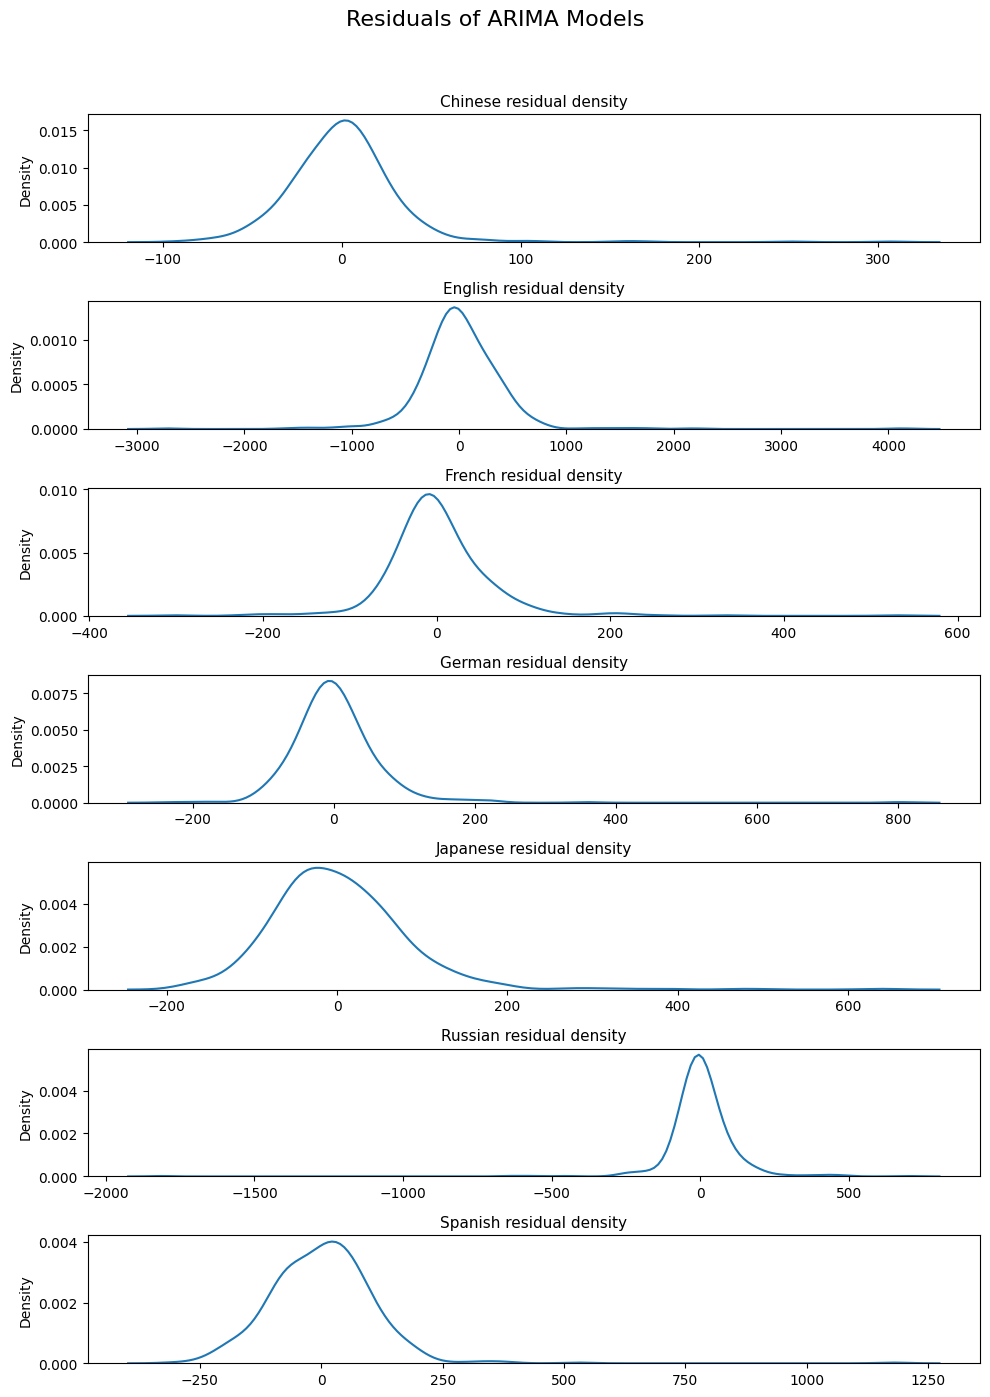

In [ ]:
plt.ioff()

fig = plt.figure(figsize=(10, 14))
fig.suptitle('Residuals of ARIMA Models', fontsize=16, y=0.995)

for i, lang in enumerate(train.columns, 1):
    ax = fig.add_subplot(7, 1, i)
    sns.kdeplot(residuals[lang], ax=ax)
    ax.set_title(f'{lang} residual density', fontsize=11)

fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


**Interpretaion**

*  The forecast lines may sit above or below the actual series in the test window, the residual center tells us what happens across all days.

*  The residual distributions for all languages are centered around zero, meaning the ARIMA models do not show systematic bias.

*  They neither consistently over-predict nor under-predict on most days — the models are balanced.

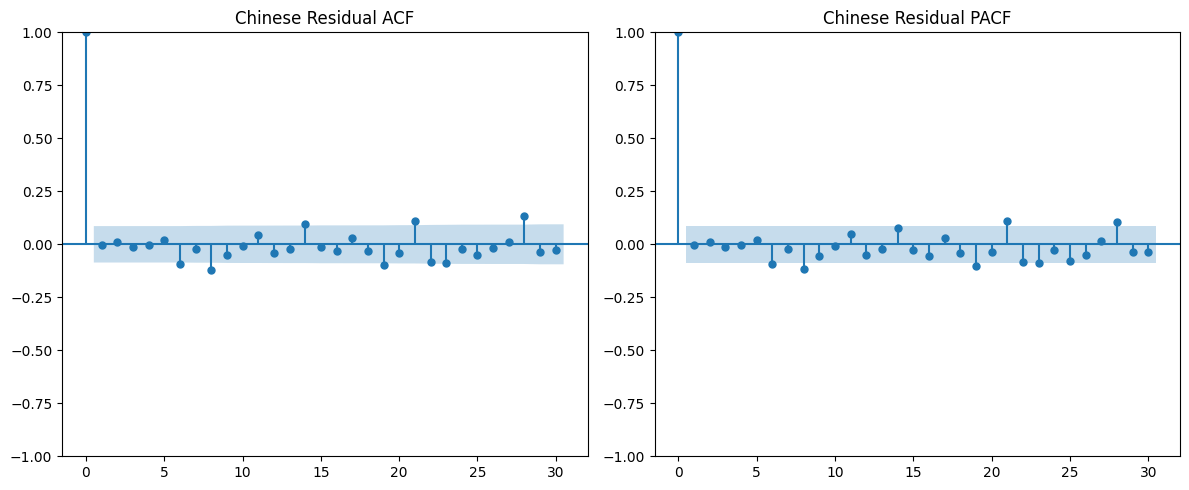

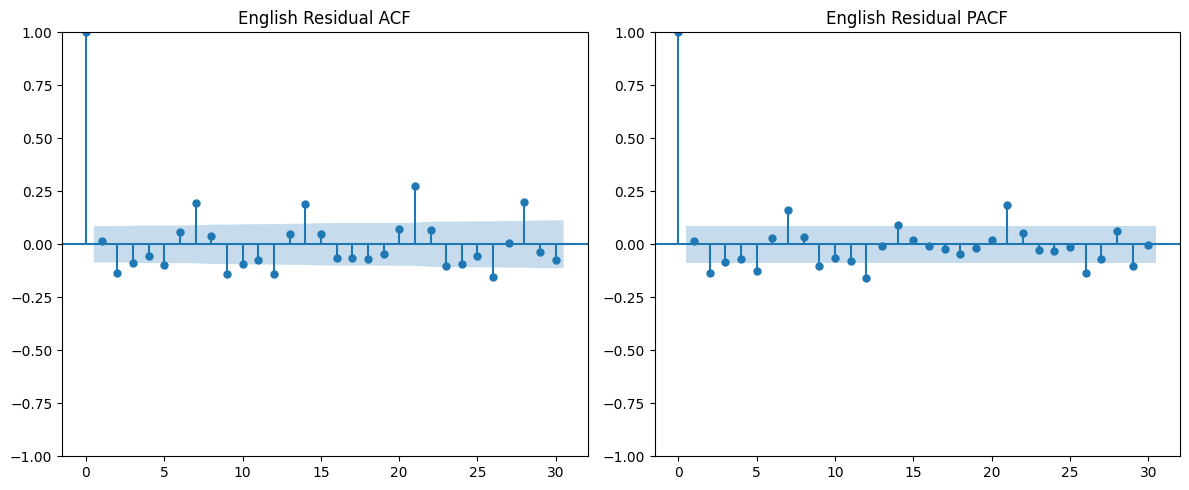

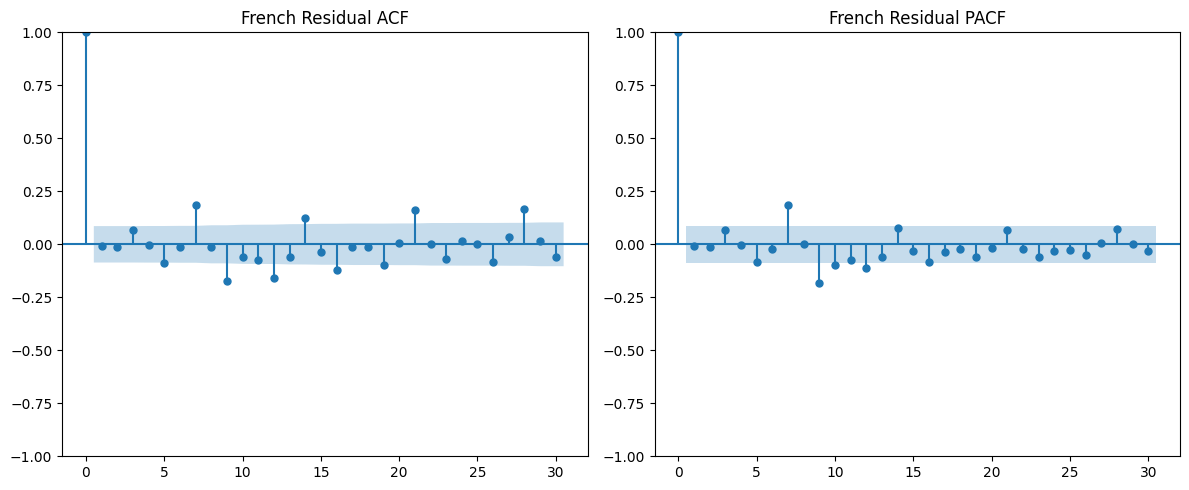

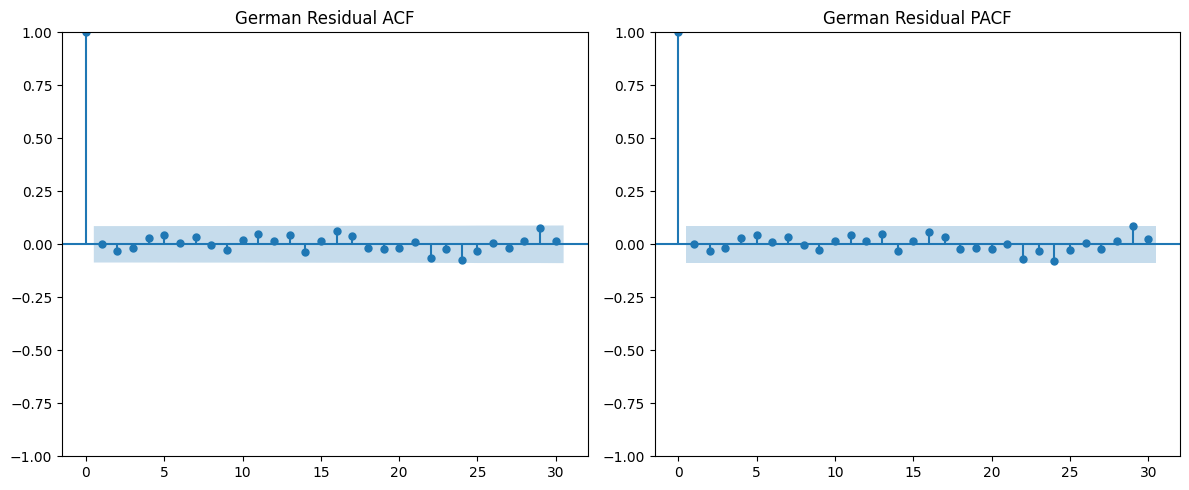

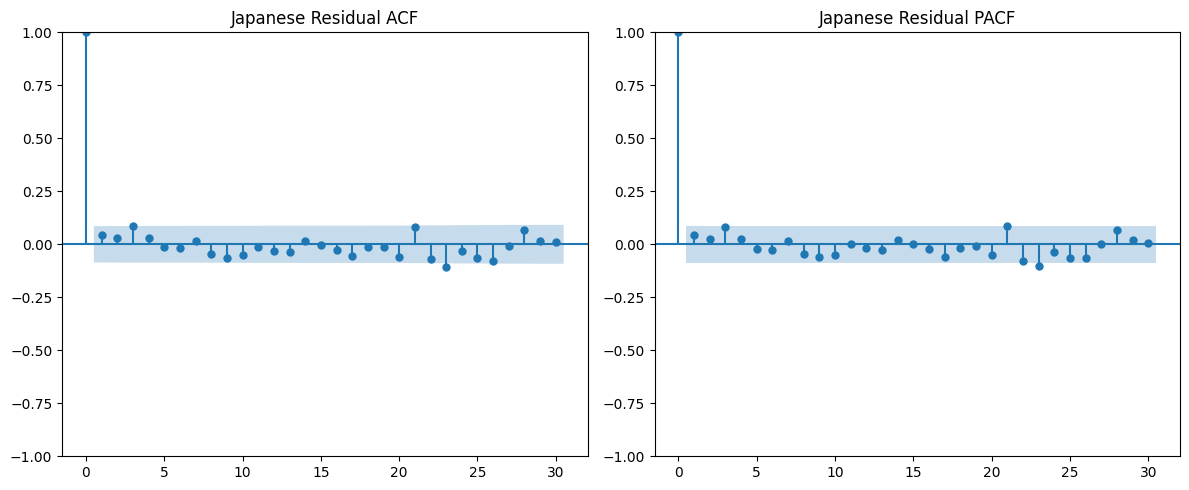

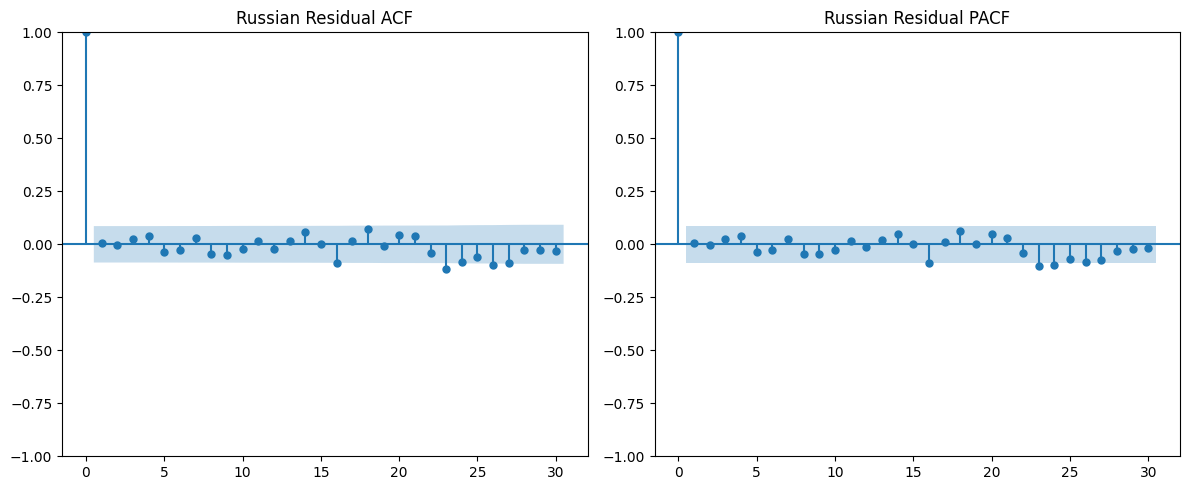

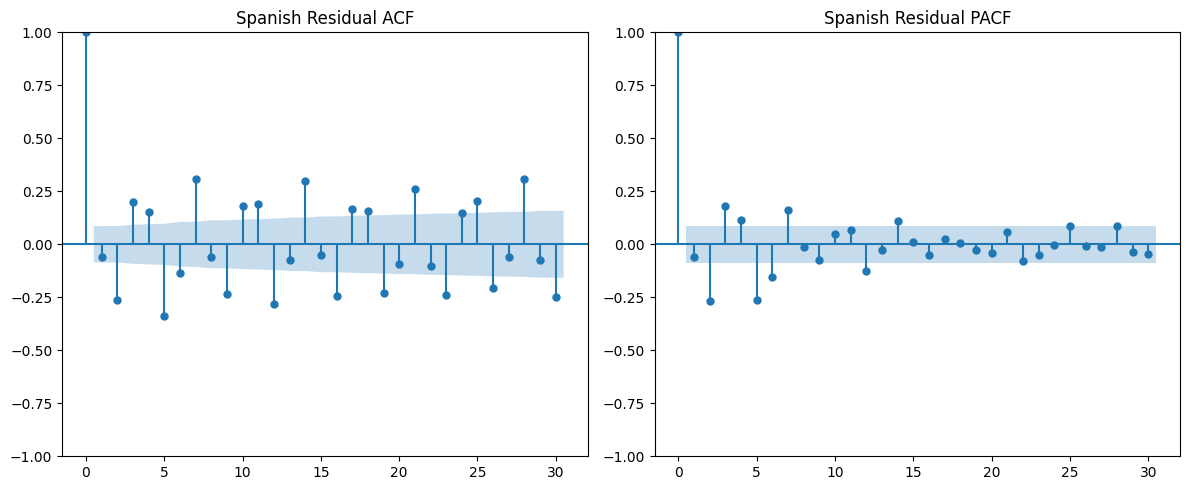

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for lang in train.columns:

    resid = residuals[lang].dropna()

    plt.figure(figsize=(12,5))
    plt.suptitle("ACF and PACF of Model Residuals", fontsize=16)

    plt.subplot(1,2,1)
    plot_acf(resid, lags=30, ax=plt.gca())
    plt.title(f"{lang} Residual ACF")

    plt.subplot(1,2,2)
    plot_pacf(resid, lags=30, ax=plt.gca())
    plt.title(f"{lang} Residual PACF")

    plt.tight_layout()
    plt.show()

**Interpretation**

*   **English, French, German, and Spanish** significant spikes remained at lags 7, 14, and 21, which correspond to a weekly seasonal pattern. This shows that ARIMA failed to remove seasonality from the data.

*  Although ARIMA can model short-term dependencies, it cannot capture recurring seasonal structures in Wikipedia page views. Therefore, a seasonal model such as SARIMA is more appropriate for this forecasting problem

#**Seasonal Diffferencing for SARIMAX Model**

**Seasonal Identification: ACF**

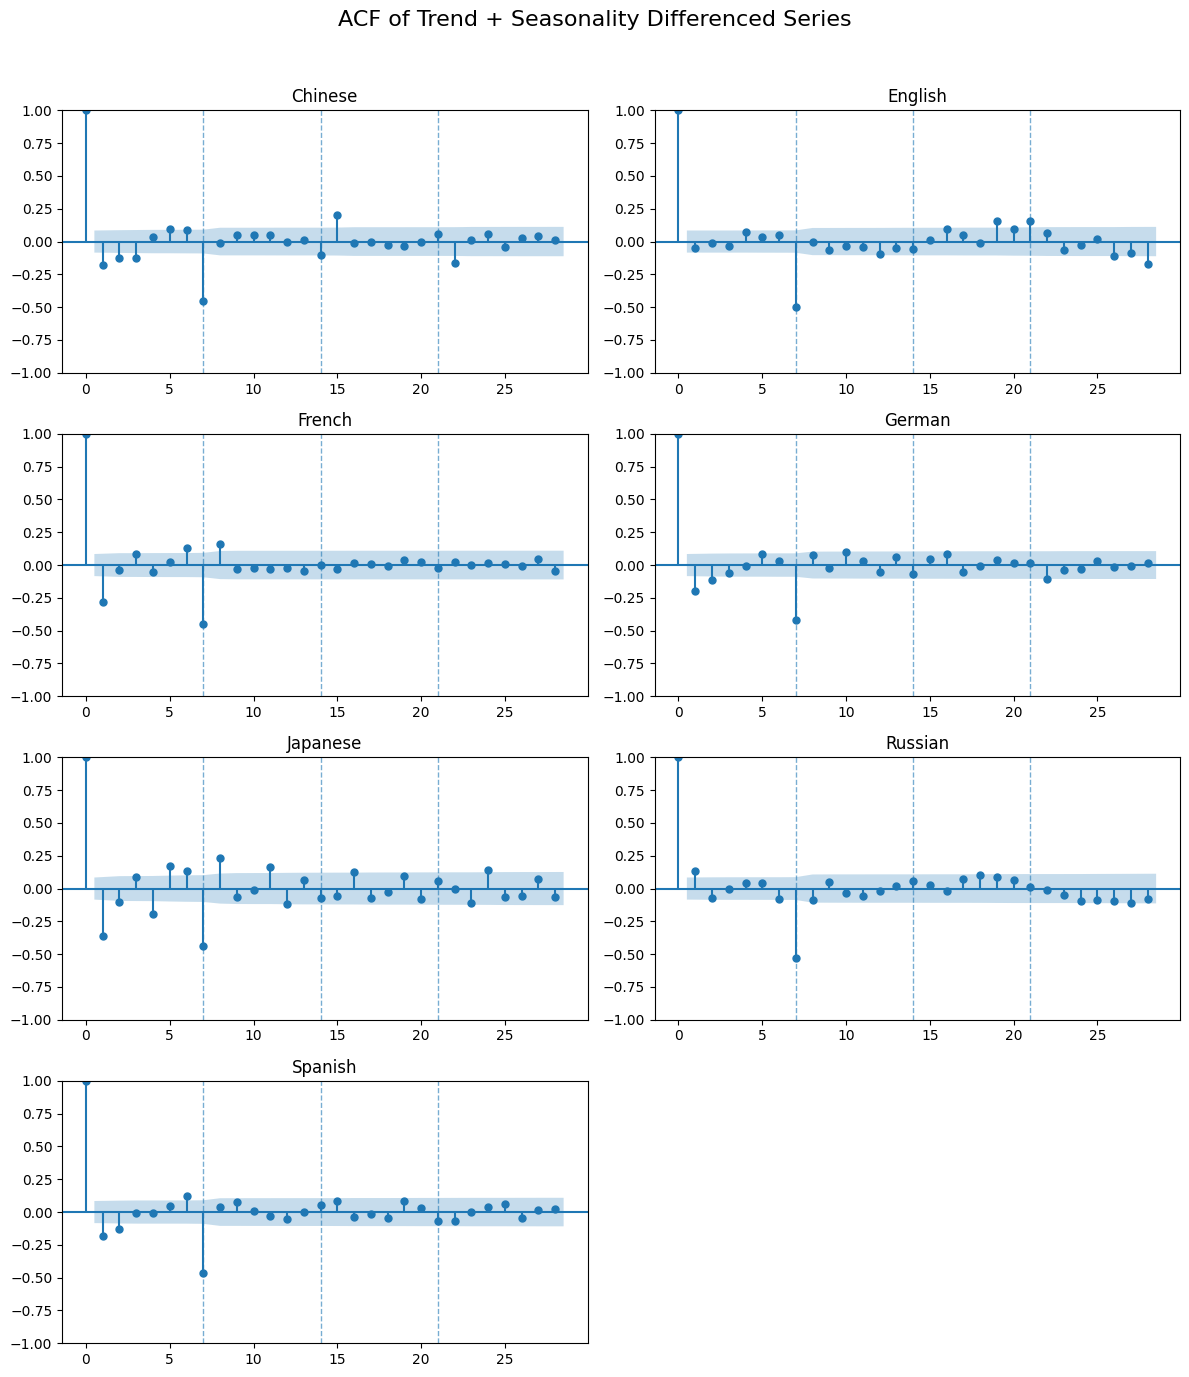

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
sea_diff=ad_ease.diff().dropna().diff(7).dropna()

seasonal_lags=[7,14,21]
plt.figure(figsize=(12,14))
plt.suptitle("ACF of Trend + Seasonality Differenced Series", fontsize=16)

for i, col in enumerate(sea_diff, 1):
    plt.subplot(4, 2, i)
    ax = plt.gca()

    # Plot ACF on this axis
    plot_acf(sea_diff[col], ax=ax)

    for lag in seasonal_lags:
        ax.axvline(lag, linestyle="--", linewidth=1, alpha=0.6)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Seasonal Identification: PACF**

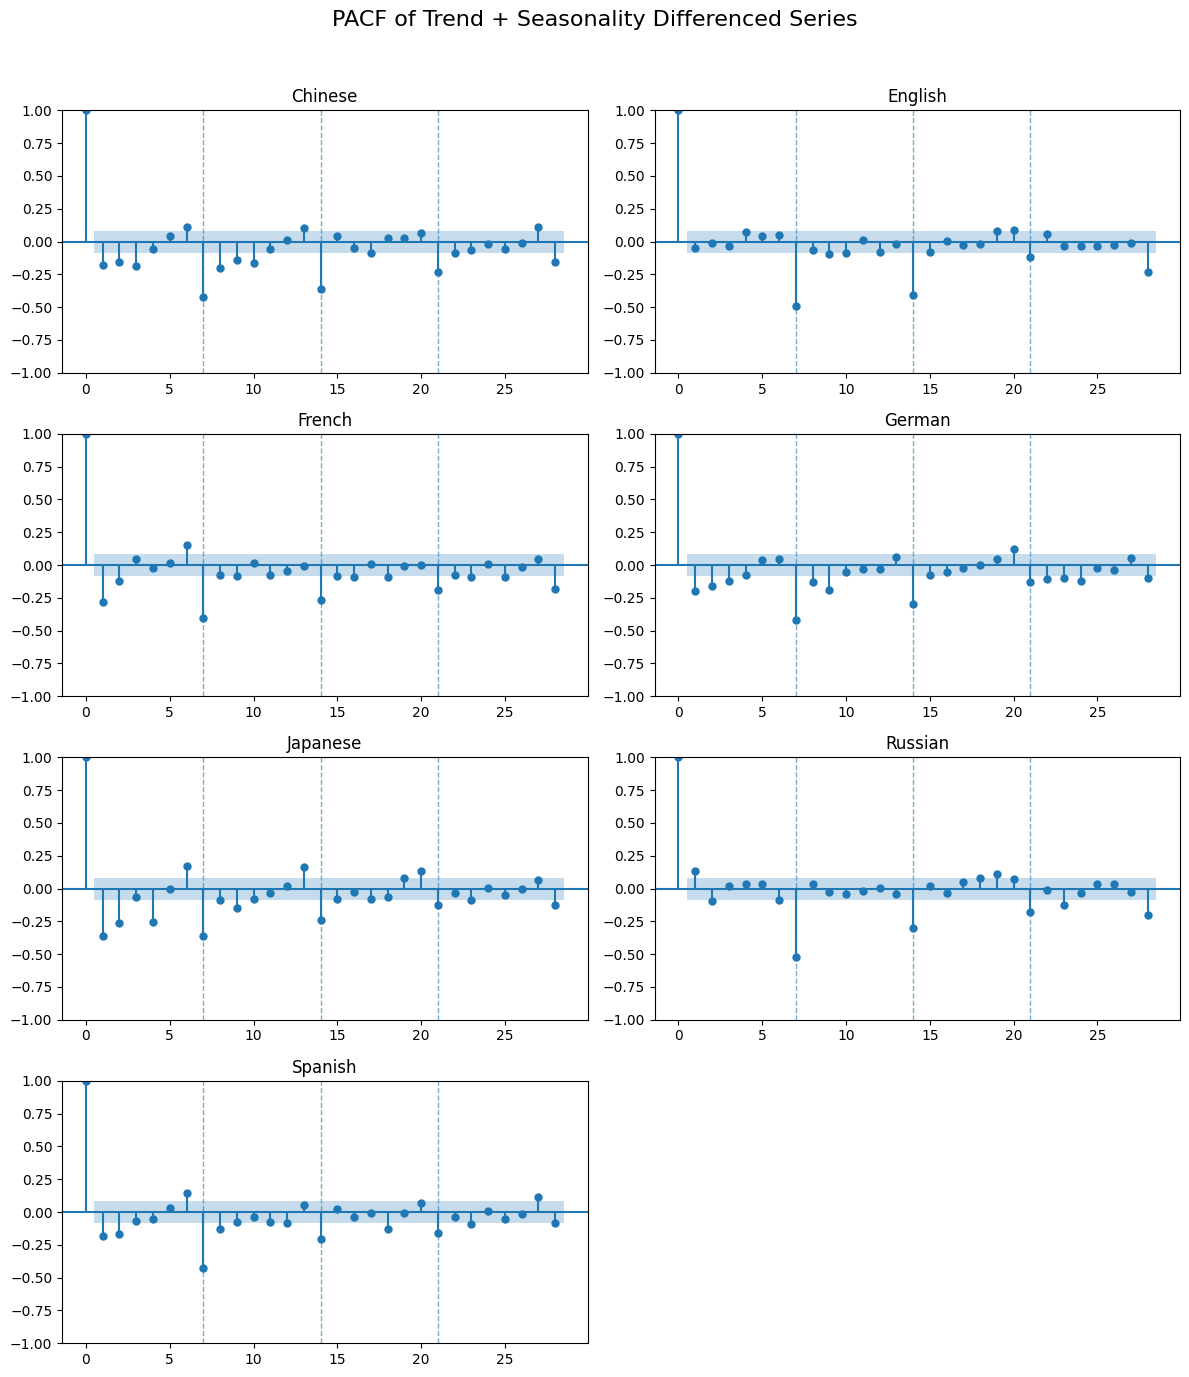

In [ ]:
plt.figure(figsize=(12,14))
plt.suptitle("PACF of Trend + Seasonality Differenced Series", fontsize=16)

for i, col in enumerate(sea_diff, 1):
    plt.subplot(4, 2, i)
    ax = plt.gca()

    # Plot ACF on this axis
    plot_pacf(sea_diff[col], ax=ax)
    for lag in seasonal_lags:
        ax.axvline(lag, linestyle="--", linewidth=1, alpha=0.6)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#**SARIMAX**

**SARIMAX Model with out Exogenous Variable**

In [ ]:
orders = { 'Chinese':(1, 1, 0),
          'English': (1, 1, 0),
          'French': (3, 1, 2),
          'German': (1, 1, 2),
          'Japanese': (2, 1, 4),
          'Russian': (3, 1, 2),
          'Spanish': (6, 0, 4)}
seasonal_orders = { 'Chinese':(3, 1, 2, 7),
                   'English': (3, 1, 1, 7),
                    'French': (3, 1, 1,7),
                    'German': (3, 1, 1,7),
                    'Japanese': (3, 1, 1,7),
                    'Russian': (3, 1, 1, 7),
                    'Spanish': (3, 1, 1, 7)}

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


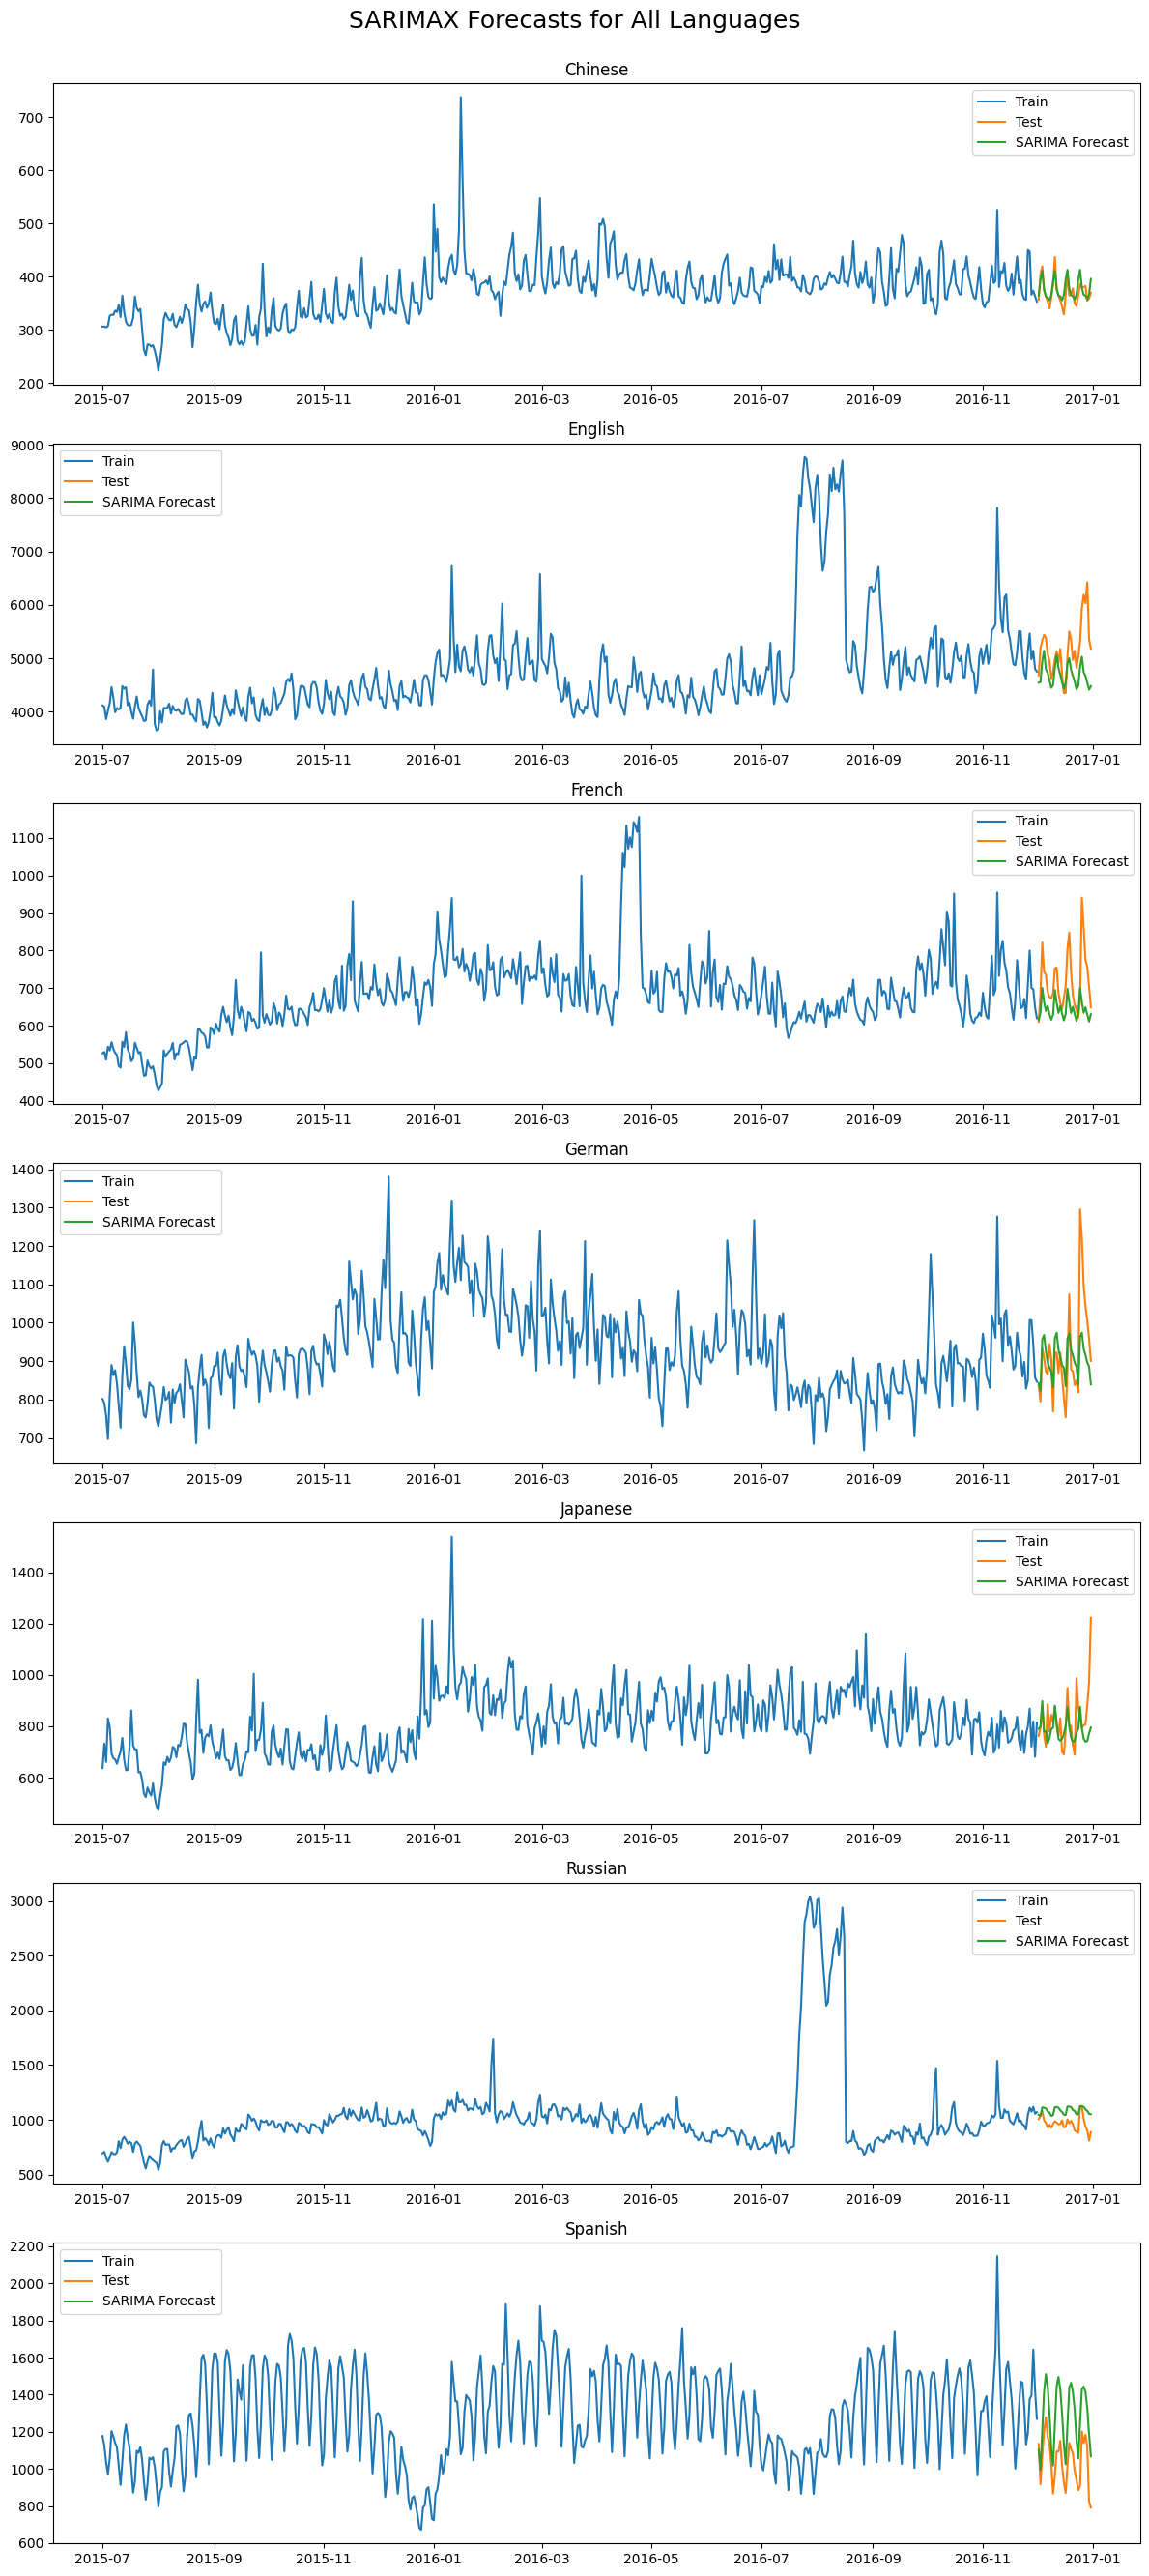

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.filterwarnings("ignore", category=ValueWarning)

languages = ['Chinese', 'English', 'French', 'German', 'Japanese', 'Russian', 'Spanish']
n = len(languages)
forecasts = {}

# Create one figure for all languages
fig, axes = plt.subplots(n, 1, figsize=(12, 4*n), sharex=False)
fig.suptitle("SARIMAX Forecasts for All Languages", fontsize=18, y=0.95)

forecasts = {}
for i,lang in enumerate(languages):
    # Fit SARIMAX
    model_sarima = SARIMAX(
        train[lang],
        order=orders[lang],
        seasonal_order=seasonal_orders[lang],
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    model_fit = model_sarima.fit()

    # Store forecast
    forecasts[lang] = model_fit.get_forecast(steps=len(test)).predicted_mean

    #Plot

    ax = axes[i]
    ax.plot(train[lang], label="Train")
    ax.plot(test[lang], label="Test")
    ax.plot(forecasts[lang], label="SARIMA Forecast")
    ax.set_title(lang)  # small title for each subplot
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

results = []

for lang in test.columns:
    actual = test[lang].values
    predicted = forecasts[lang]
    mape_score = mean_absolute_percentage_error(actual, predicted)
    results.append(mape_score)
    print(f'{lang}: MAPE ---> {mape_score:.4f}')

Chinese: MAPE ---> 0.0335
English: MAPE ---> 0.0922
French: MAPE ---> 0.0999
German: MAPE ---> 0.0747
Japanese: MAPE ---> 0.0762
Russian: MAPE ---> 0.1251
Spanish: MAPE ---> 0.2331


**Interpretation**

*  The **SARIMAX** model produces forecasts that effectively capture the underlying seasonality found in the historical data.

*  **Chinese** shows the best forecast accuracy because its traffic exhibits strong, stable seasonal behavior with low noise.

*  **Spanish** has the highest MAPE because it has lower traffic volume and higher relative volatility, which inflates the mape. This does not mean SARIMA fails for Spanish, but that Spanish traffic is intrinsically harder to forecast.

**SARIMAX Model - English (with Exogenous Variable)**

In [ ]:
train_sa = ad_ease.iloc[:520]
test_sa = ad_ease.iloc[520:]


In [ ]:
exo_train = exo.iloc[:len(train_sa)]
exo_test = exo.iloc[len(train_sa):len(train_sa)+len(test_sa)]

In [ ]:
exo_train.index = train_sa.index
exo_test.index= test_sa.index

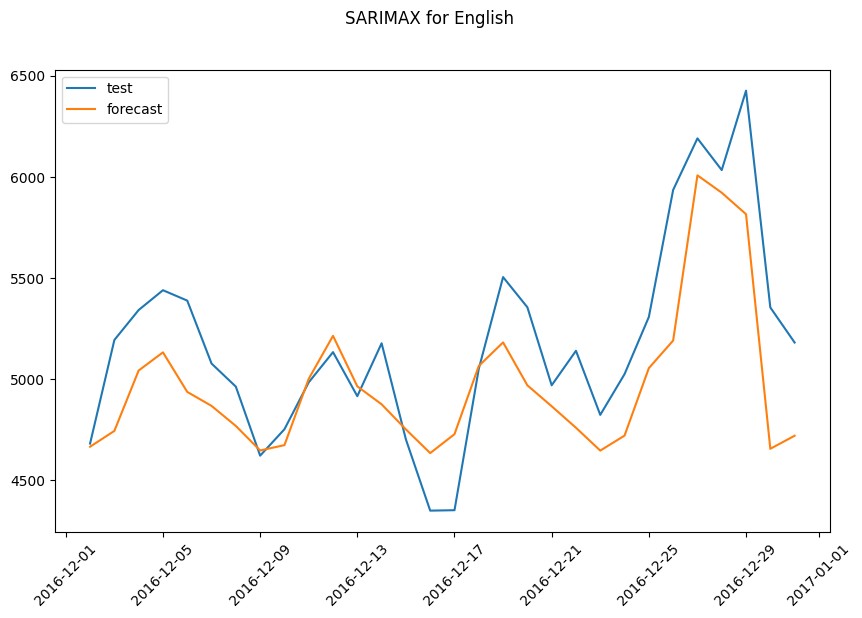

In [ ]:
model = SARIMAX(
    train_sa['English'], order=(1, 1, 0), seasonal_order=(3, 1, 1, 7), exog=exo_train,
    enforce_stationarity=False,
    enforce_invertibility=False
    )
model_en=  model.fit()

forecast_en= model_en.forecast(steps=len(test_sa), exog=exo_test)
#plot
plt.figure(figsize=(10,6))
plt.suptitle('SARIMAX for English')
plt.plot(test_sa['English'], label='test')
plt.plot(forecast_en,label='forecast')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Interpretaion**

*  The SARIMA forecast for the English language shows a mix of slight under-prediction and accurate prediction on unseen data. Overall, the model is able to follow the general movement and seasonal structure of the time series.

*  There is a sharp increase in viewers between **December 25 and December 31.**
 This period coincides with Christmas, New Year, and winter holidays, during which people have more free time and tend to spend more time online, including browsing Wikipedia. Since English is the most widely used language on the internet, this holiday effect is especially visible in the English Wikipedia traffic.

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import  mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
actual = test_sa['English'].values
pred = forecast_en.values
print(
    "MAPE:", mape(actual, pred),"\nMSE:",mse(actual,pred), "\nMAE:",mae(actual,pred)
)

MAPE: 0.04997148697754403 
MSE: 109066.22200333461 
MAE: 264.5542958916188


**Interpretation**

*  With the **exogenous variable**, the SARIMA model's **MAPE decreased from 0.092 to 0.049**, effectively **halving** the error compared to the model without it. This demonstrates that the exogenous variable plays a significant role in improving the time series forecast.

#Facebook Prophet

In [ ]:
df_en= ad_ease.reset_index().rename(
    columns={'Dates':'ds', 'English':'y'}
)

df_en = df_en.drop(
    ['Chinese','French','German','Japanese','Russian','Spanish'], axis=1
)
exog_cols=exo.columns
df_en[exog_cols]=exo


In [ ]:
df_en.head()

Language         ds            y  Exog
0        2015-07-01  4120.242704     0
1        2015-07-02  4096.969675     0
2        2015-07-03  3863.318780     0
3        2015-07-04  4020.385549     0
4        2015-07-05  4157.757910     0

In [ ]:
exo.describe()

Exog
count  550.000000
mean     0.098182
std      0.297831
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000

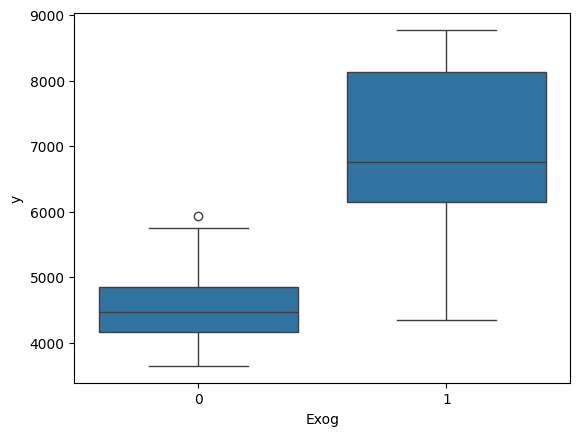

In [ ]:
sns.boxplot(y='y', x='Exog', data=df_en)
plt.show()

**Insights**

*  The exogenous variable (campaign or major event) has a **significant positive impact** on the average number of English viewers.

*  During normal days (Exog = 0), the platform receives relatively stable and lower traffic, with a median of about **4,500 viewers per page.**
In contrast, campaign days (Exog = 1) show a much higher level of engagement, with the median rising to approximately 6,600 viewers per page.

**Data Split**

In [ ]:
train_en = df_en.iloc[:520]
test_en = df_en.iloc[520:]


**Prophet Model_1**

In [ ]:
from prophet import Prophet

In [ ]:
#model_tune = Prophet(changepoint_prior_scale=0.3, seasonality_prior_scale=5, holidays_prior_scale=3)
from prophet import Prophet
model = Prophet()
#add regressor
model.add_regressor('Exog')

#add seasonality
model.add_seasonality(name='monthly',
    period=30.5,
    fourier_order=2
)
model.fit(train)

#Future prediction
p_future_tu = test_en[['ds','Exog']]
forecast_p_tu= model.predict(p_future_tu)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


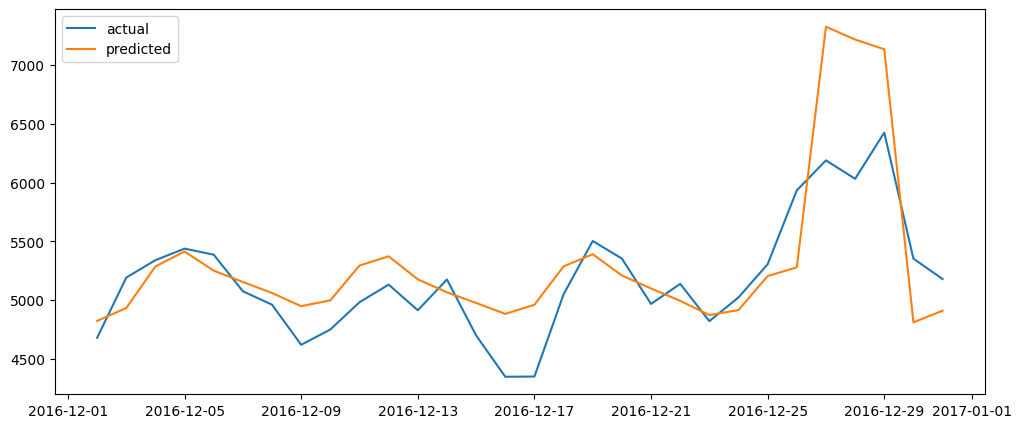

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(test['ds'],test['y'],label='actual')
plt.plot(forecast_p_tu['ds'], forecast_p_tu['yhat'],label='predicted')
plt.legend()
plt.show()

**Insights**

*  The model predicts many data points accurately, but it tends to over-predict around sharp dips and spikes.

*  when the actual series shows sudden drops or peaks, the forecast remains stable for some points and capute the sudden spikes also.

*  Overall, the model provides a good fit to the underlying pattern, and its performance can be quantitatively validated by computing the MAPE on the test set.

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
mae =mae(test_en['y'], forecast_p_tu['yhat'])
rmse=np.sqrt(mse(test['y'], forecast_p_tu['yhat']))
mape= mape(test['y'], forecast_p_tu['yhat'])

print(f' mae --- {mae}, \n rmse --- {rmse} \n mape --- {mape}')

 mae --- 307.95621788115045, 
 rmse --- 424.4905452136081 
 mape --- 0.057940612749162984


In [ ]:
best_params_all = {}

for lang in languages:
    train = all_l[lang]

    rmse_list = []
    for params in all_params:
        m = Prophet(**params)
        m.add_regressor('Exog')
        m.add_seasonality(name='monthly', period=30.5, fourier_order=2)
        m.fit(train)

        df_cv = cross_validation(...)
        df_p = performance_metrics(df_cv)
        rmse_list.append(df_p['mape'].mean())

    results = pd.DataFrame(all_params)
    results['mape'] = rmse_list
    best_params_all[lang] = results.sort_values('mape').iloc[0]

**Prophet Hyperparameter Grid Search with Cross-Validation**

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
import itertools
param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1, 0.3],
    'seasonality_prior_scale': [1, 5, 10],
    'holidays_prior_scale':[1,5,10],
    'seasonality_mode': ['additive', 'multiplicative']
}


all_params = [dict(zip(param_grid.keys(), v))
              for v in itertools.product(*param_grid.values())]


rmse_list = []

for params in all_params:
    print(params)

    m = Prophet(**params)

    # Add your external regressor
    m.add_regressor('Exog')

    # Add your monthly seasonality
    m.add_seasonality(name='monthly', period=30.5, fourier_order=2)

    # Fit on training data
    m.fit(train)

    # Time series cross validation
    df_cv = cross_validation(
        m,
        initial='400 days',
        period='30 days',
        horizon='90 days'
    )

    # Performance
    df_p = performance_metrics(df_cv)
    rmse_list.append(df_p['mape'].mean())

# Collect results
results = pd.DataFrame(all_params)
results['mape'] = rmse_list

# Best model
best_params = results.sort_values('mape').iloc[0]
best_params

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 1, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 1, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 1, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 1, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 1, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 1, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 1, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 1, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 1, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 1, 'seasonality_mode': 'additive'}


INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive'}


INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'}


INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'}


INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 1, 'seasonality_mode': 'additive'}


INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative'}


INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive'}


INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'}


INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 5, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'}


INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 1, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 1, 'seasonality_mode': 'multiplicative'}


INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 5, 'seasonality_mode': 'additive'}


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 5, 'seasonality_mode': 'multiplicative'}


INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 10, 'seasonality_mode': 'additive'}


INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2016-09-02 00:00:00 and 2016-09-02 00:00:00


{'changepoint_prior_scale': 0.3, 'seasonality_prior_scale': 10, 'holidays_prior_scale': 10, 'seasonality_mode': 'multiplicative'}


  0%|          | 0/1 [00:00<?, ?it/s]

changepoint_prior_scale         0.3
seasonality_prior_scale           5
holidays_prior_scale              1
seasonality_mode           additive
mape                       0.044268
Name: 60, dtype: object

**Prophet Model2**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


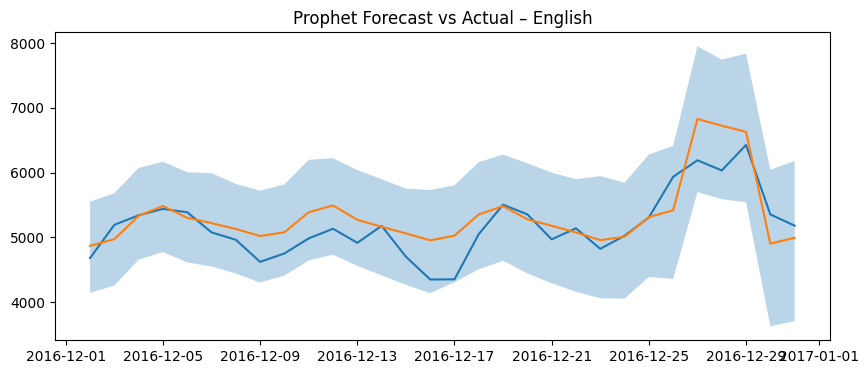

In [ ]:
model = Prophet(
    changepoint_prior_scale=0.4, seasonality_prior_scale=7.5,
    holidays_prior_scale=1,interval_width=0.95)

#add regressor
model.add_regressor('Exog')

#add seasonality
model.add_seasonality(name='monthly',
    period=30.5,
    fourier_order=2)
model.fit(train)

p_future = test_en[['ds','Exog']]
forecast_p = model.predict(p_future)

#plot
plt.figure(figsize=(10,4))
plt.title("Prophet Forecast vs Actual – English")
plt.plot(test_en['ds'], test_en['y'], label='Actual')
plt.plot(forecast_p['ds'], forecast_p['yhat'], label='Predicted')

#Confidence
plt.fill_between(
    forecast_p['ds'], forecast_p['yhat_lower'], forecast_p['yhat_upper'],
    alpha=0.3, label = '95% Confidence Interval'
)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape

print("English MAPE:", mape(test['y'], forecast_p['yhat']))

English MAPE: 0.05147688760780737


**Interpretaion**

*  Hyperparameter tuning improved the Prophet model's accuracy slightly, reducing error from **0.0579 to 0.0514.**

*  The forecasted average number of viewers for English Wikipedia pages is expected to fall approximately between 3,500 and 8,000

**Adding Holiday Effects and Weekly Effects**

In [ ]:
new_en=df_en.copy()

In [ ]:
new_en['day_of_week']=new_en['ds'].dt.day_name()

In [ ]:
weekend_days = {"Friday", "Saturday", "Sunday"}
new_en['is_weekend']=new_en['day_of_week'].isin(weekend_days).astype(int)

In [ ]:
new_en['is_weekday']=(~new_en['day_of_week'].isin(weekend_days)).astype(int)

In [ ]:
exo_cols = ['Exog','is_weekend','is_weekday']

In [ ]:
new_en.head()

Language         ds            y  Exog day_of_week  is_weekend  is_weekday
0        2015-07-01  4120.242704     0   Wednesday           0           1
1        2015-07-02  4096.969675     0    Thursday           0           1
2        2015-07-03  3863.318780     0      Friday           1           0
3        2015-07-04  4020.385549     0    Saturday           1           0
4        2015-07-05  4157.757910     0      Sunday           1           0

In [ ]:
print(df_en['ds'].iloc[0])
print(df_en['ds'].iloc[-1])

2015-07-01 00:00:00
2016-12-31 00:00:00


In [ ]:
holidays = pd.DataFrame({
    'holiday': [
        # 2015
        'new_year', 'republic_day', 'holi', 'independence_day', 'diwali', 'christmas', 'thanksgiving', 'black_friday', 'us_independence',
        # 2016
        'new_year', 'republic_day', 'holi', 'independence_day', 'diwali', 'christmas', 'thanksgiving', 'black_friday', 'us_independence'
    ],
    'ds': [
        # 2015
        '2015-01-01', '2015-01-26', '2015-03-06', '2015-08-15', '2015-11-11', '2015-12-25', '2015-11-26', '2015-11-27', '2015-07-04',
        # 2016
        '2016-01-01', '2016-01-26', '2016-03-24', '2016-08-15', '2016-10-30', '2016-12-25', '2016-11-24', '2016-11-25', '2016-07-04'
    ]
})

# Convert ds to datetime
holidays['ds'] = pd.to_datetime(holidays['ds'])

# Optional: remove holidays that are before your training start date
holidays = holidays[holidays['ds'] >= pd.to_datetime('2015-07-01')]



In [ ]:
new_train = new_en.iloc[:520]
new_test = new_en.iloc[520:]

In [ ]:
from prophet import Prophet
en_model = Prophet(
    holidays=holidays,changepoint_prior_scale=0.4, seasonality_prior_scale=7.5,
    holidays_prior_scale=1)
for col in exo_cols:
    en_model.add_regressor(col)
en_model.add_seasonality(name='monthly',
                         period=30.5,
                         fourier_order=2)
en_model.fit(new_train)
future = new_test[['ds','is_weekend','is_weekday','Exog']]
forecast_en = en_model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(new_test['y'], forecast_en['yhat'])

0.052778973966495904

**Prophet Model without Holiday effect**

In [ ]:
en_model_no_holiday = Prophet(
    changepoint_prior_scale=0.4,
    seasonality_prior_scale=7.5
)

en_model_no_holiday.add_regressor('Exog')
en_model_no_holiday.add_regressor('is_weekend')
en_model_no_holiday.add_regressor('is_weekday')

en_model_no_holiday.add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=2
)

en_model_no_holiday.fit(new_train)

future = new_test[['ds','Exog','is_weekend','is_weekday']]
forecast_no_holiday = en_model_no_holiday.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
print(mape(new_test['y'], forecast_no_holiday['yhat']))

0.05157911013214969


Incorporating holidays and weekly effects into the Prophet model did not change the MAPE, the accuracy remains unchanged. This indicates that the campaign (Exog) is the dominant driver of English traffic, while calendar-based effects such as weekends and holidays have only a marginal impact.

In [ ]:
future = m.make_future_dataframe(periods=365)
# Add regressor values for 2017 campaigns (0 or 1)
future['Exog'] = 0

# Forecast
forecast_2017 = m.predict(future)

In [ ]:
forecast_2017.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2015-07-01  3913.593676  3274.628072  4430.103055  3913.593676  3913.593676   
1 2015-07-02  3916.826421  3176.602478  4349.812963  3916.826421  3916.826421   
2 2015-07-03  3920.059165  3176.646509  4313.553886  3920.059165  3920.059165   
3 2015-07-04  3923.291910  3246.166711  4418.913314  3923.291910  3923.291910   
4 2015-07-05  3926.524654  3461.699520  4712.638242  3926.524654  3926.524654   

   Exog  Exog_lower  Exog_upper  additive_terms  ...  us_independence  \
0   0.0         0.0         0.0      -30.717817  ...         0.000000   
1   0.0         0.0         0.0     -110.569958  ...         0.000000   
2   0.0         0.0         0.0     -217.880302  ...         0.000000   
3   0.0         0.0         0.0      -96.693695  ...        58.261822   
4   0.0         0.0         0.0      171.599833  ...         0.000000   

   us_independence_lower  us_independence_upper      weekly  weekly_lower  \
0               0.000000               0.000000  -30.717817    -30.717817   
1               0.000000               0.000000 -110.569958   -110.569958   
2               0.000000               0.000000 -217.880302   -217.880302   
3              58.261822              58.261822 -154.955517   -154.955517   
4               0.000000               0.000000  171.599833    171.599833   

   weekly_upper  multiplicative_terms  multiplicative_terms_lower  \
0    -30.717817                   0.0                         0.0   
1   -110.569958                   0.0                         0.0   
2   -217.880302                   0.0                         0.0   
3   -154.955517                   0.0                         0.0   
4    171.599833                   0.0                         0.0   

   multiplicative_terms_upper         yhat  
0                         0.0  3882.875860  
1                         0.0  3806.256463  
2                         0.0  3702.178863  
3                         0.0  3826.598214  
4                         0.0  4098.124487  

[5 rows x 52 columns]

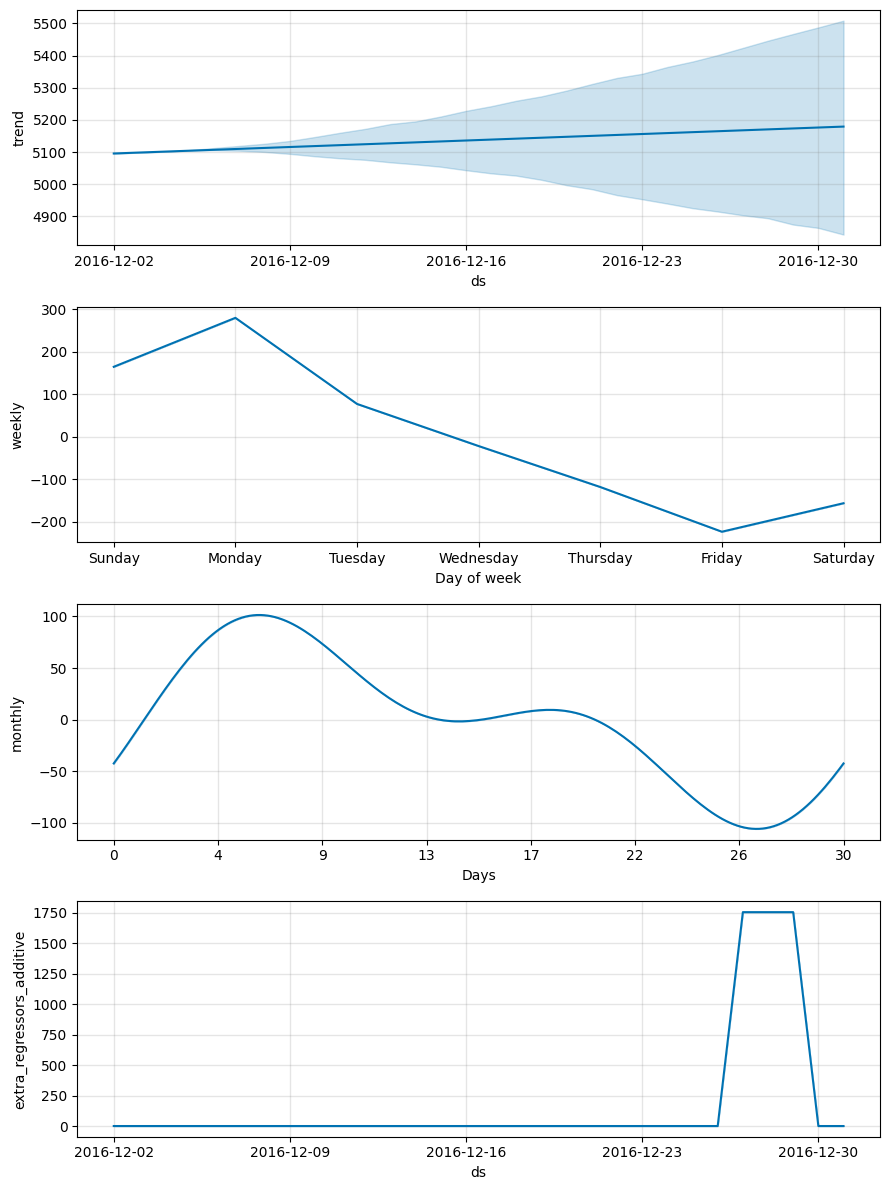

In [ ]:
from prophet.plot import plot_components

fig = model.plot_components(forecast_p_tu)

**Interpretation**

*  **Trend** - The trend (unseen data) line slightly moves upward but not linear. In the beginning months there is no uncertainty. It increases as predict more into future months.

*  **Weekly pattern** - Viewership peaks on Monday and declines toward the end of the week.

*  **Monthly pattern** → Highest traffic occurs during the first week of the month, then decreases, possibly due to work schedules.

*  **Campaign (Exog)** → Campaign days, especially in December, cause significant spikes, confirming the positive impact of promotional events.

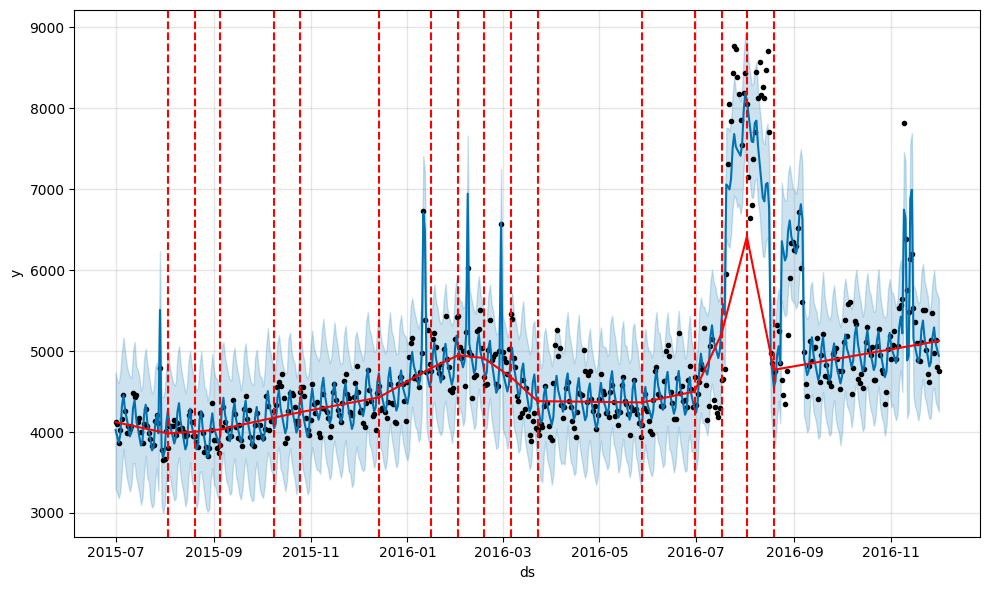

In [ ]:
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt

train_fut = train_en[['ds','Exog']]
train_pred = model.predict(train_fut)
fig = model.plot(train_pred)
_ = add_changepoints_to_plot(fig.gca(), model, train_pred)

**Interpretation**

*  There is a gradual increase in the baseline(red line) trend during 2015. In early 2016 the trend flattens, indicating slower growth.

*  Around mid-2016, a major **changepoint** occurs, after which the baseline level shifts upward and continues to increase steadily at a higher level, indicating that English page views are likely to continue growing.

**Prophet model for Chinese language**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


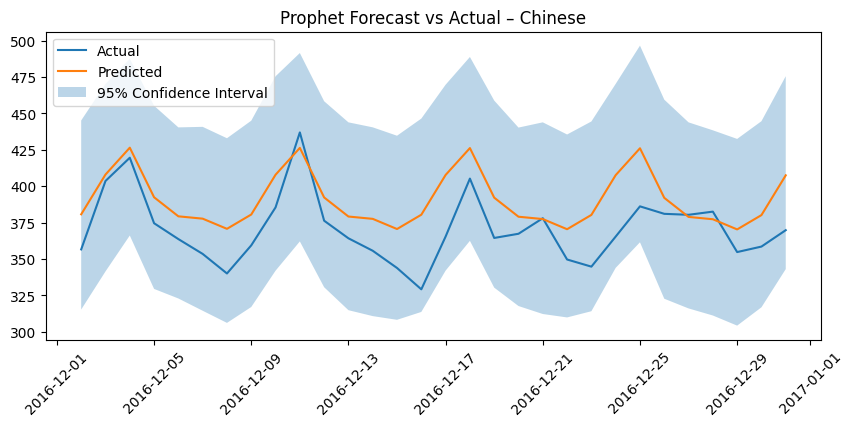

In [ ]:
#Data preparation
df_ch = ad_ease.reset_index().rename(
    columns={'Dates':'ds','Chinese':'y'}
)
df_ch = df_ch.drop(['English','French','German','Japanese','Russian','Spanish'], axis=1)

#Data split
train_ch= df_ch.iloc[:520]
test_ch = df_ch.iloc[520:]

#Fit Phophet model
m_ch = Prophet(interval_width=0.95)
m_ch.fit(train_ch)
future = test_ch[['ds']]
forecast_ch =m_ch.predict(future)

#Plot
plt.figure(figsize=(10,4))
plt.title("Prophet Forecast vs Actual – Chinese")
plt.plot(test_ch['ds'], test_ch['y'], label='Actual')
plt.plot(forecast_ch['ds'], forecast_ch['yhat'], label='Predicted')

#Confidence interval
plt.fill_between(
    forecast_ch['ds'], forecast_ch['yhat_lower'], forecast_ch['yhat_upper'],
    alpha=0.3, label = '95% Confidence Interval'
)
plt.xticks(rotation=45)
plt.legend()

In [ ]:
print('Chinese :', mean_absolute_percentage_error(test_ch['y'],forecast_ch['yhat']) )

Chinese : 0.0591724737496739


**Interpretation**

*  The Prophet model for the Chinese language captures the underlying pattern well.

*  The forecasted values lie within the provided confidence interval, indicating reliable uncertainty estimates.

*  The future average viewer count is expected to fall approximately between **300 and 500**.

*  On average, the Prophet model's forecasts deviate by about 5% from the true values. This error remains similar to the **SARIMAX** results and likely arises from factors the model cannot observe or learn, such as random fluctuations, unobserved external events, or inherent noise in the data.

**Prophet model for French language**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


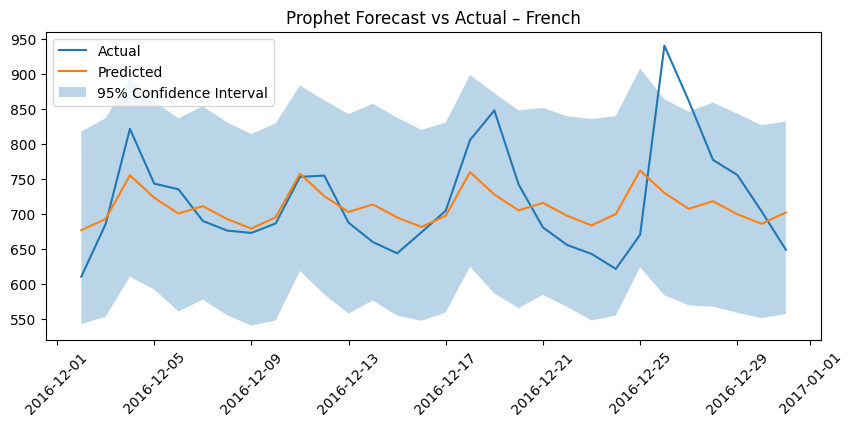

In [ ]:
df_fr = ad_ease.reset_index().rename(
    columns={'Dates':'ds','French':'y'}
)
df_fr = df_fr.drop(
    ['English','Chinese','German','Japanese','Russian','Spanish'], axis=1
)

#Data split
train_fr = df_fr.iloc[:520]
test_fr = df_fr.iloc[520:]

#Fit Prophet Model
m_fr = Prophet(interval_width=0.95)
m_fr = m_fr.fit(train_fr)
future = test_fr[['ds']]
forecast_fr=m_fr.predict(future)

#Plot
plt.figure(figsize=(10,4))
plt.title("Prophet Forecast vs Actual – French")
plt.plot(test_fr['ds'], test_fr['y'], label='Actual')
plt.plot(forecast_fr['ds'], forecast_fr['yhat'], label='Predicted')

#Confidence interval
plt.fill_between(
    forecast_fr['ds'], forecast_fr['yhat_lower'], forecast_fr['yhat_upper'],
    alpha=0.3, label = '95% Confidence Interval'
)
plt.xticks(rotation=45)
plt.legend()



In [ ]:
print('French :', mean_absolute_percentage_error(test_fr['y'],forecast_fr['yhat']))

French : 0.06518839182046596


**Interpretaion**

*  The Prophet model **outperforms SARIMAX**, with the error metric decreasing from **0.099 to 0.065.** Based on this model, the future average viewers count is expected to fall between approximately 800 and 1900.


**Prophet model for German language**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


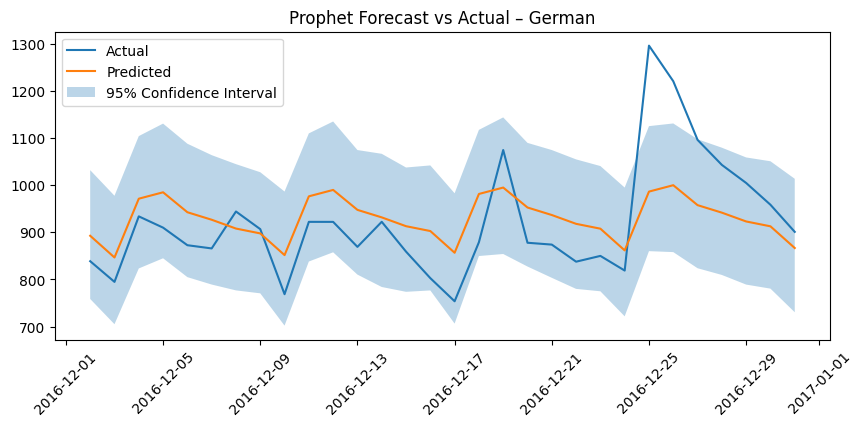

In [ ]:
df_gr = ad_ease.reset_index().rename(
    columns={'Dates':'ds','German':'y'}
)
df_gr = df_gr.drop(['English','Chinese','French','Japanese','Russian','Spanish'], axis=1)

#Data split
train_gr = df_gr.iloc[:520]
test_gr = df_gr.iloc[520:]

#Fit Prophet Model
m_gr = Prophet(interval_width=0.95)
m_fr = m_gr.fit(train_gr)
future = test_gr[['ds']]
forecast_gr=m_gr.predict(future)

#Plot
plt.figure(figsize=(10,4))
plt.title("Prophet Forecast vs Actual – German")
plt.plot(test_gr['ds'], test_gr['y'], label='Actual')
plt.plot(forecast_gr['ds'], forecast_gr['yhat'], label='Predicted')

#Confidence interval
plt.fill_between(
    forecast_fr['ds'], forecast_gr['yhat_lower'], forecast_gr['yhat_upper'],
    alpha=0.3, label = '95% Confidence Interval'
)
plt.xticks(rotation=45)
plt.legend()

In [ ]:
print('German :', mean_absolute_percentage_error(test_gr['y'],forecast_gr['yhat']))

German : 0.08290259296169998


**Interpretaion**

*   The forecasted time series is generally smoother or more stable than the actual data.

*   The forecasted time series captures the average behavior of the viewers but does not capture sudden spikes in the actual data, as these events are unusual.

*  The future average viewer count is expected to fall between approximately 700 and 1200, based on the visual representation in the graph's 95% confidence interval.

*  MAPE is slightly lower higher than SARIMAX.



**Prophet model for Japanese language**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


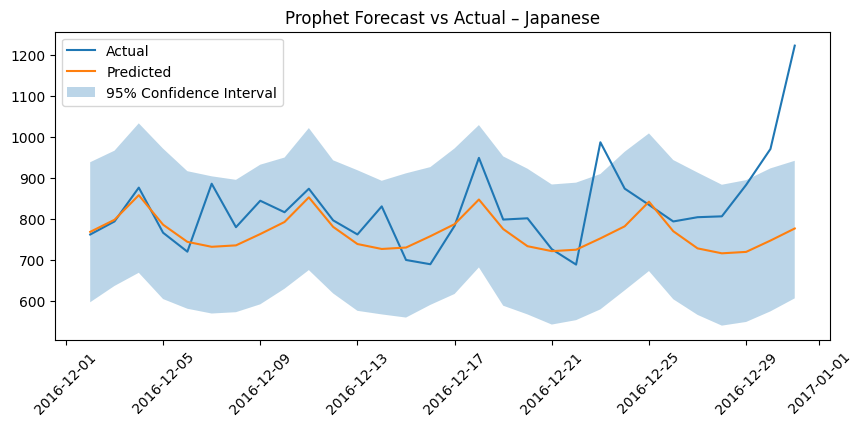

In [ ]:
df_j = ad_ease.reset_index().rename(
    columns={'Dates':'ds','Japanese':'y'}
)
df_j = df_j.drop(['English','Chinese','French','German','Russian','Spanish'], axis=1)

#Data split
train_j = df_j.iloc[:520]
test_j = df_j.iloc[520:]

#Fit Prophet model
m_j = Prophet(interval_width=0.95)
m_j = m_j.fit(train_j)
future = test_j[['ds']]
forecast_j=m_j.predict(future)

#Plot
plt.figure(figsize=(10,4))
plt.title("Prophet Forecast vs Actual – Japanese")
plt.plot(test_j['ds'], test_j['y'], label='Actual')
plt.plot(forecast_j['ds'], forecast_j['yhat'], label='Predicted')

#Confidence interval
plt.fill_between(
    forecast_j['ds'], forecast_j['yhat_lower'], forecast_j['yhat_upper'],
    alpha=0.3, label = '95% Confidence Interval'
)
plt.xticks(rotation=45)
plt.legend()


In [ ]:
print('Japanese :', mean_absolute_percentage_error(test_j['y'],forecast_j['yhat']))

Japanese : 0.08135123130340559


**Interpretation**

*  Similar to the SARIMAX model, the Prophet model for Japanese captures the average user behavior but fails to capture unexpected spikes in the time series.

*  The forecast indicates that the future average viewers count will lie in the range of approximately 500 to 1050.

**Prophet model for Russian language**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


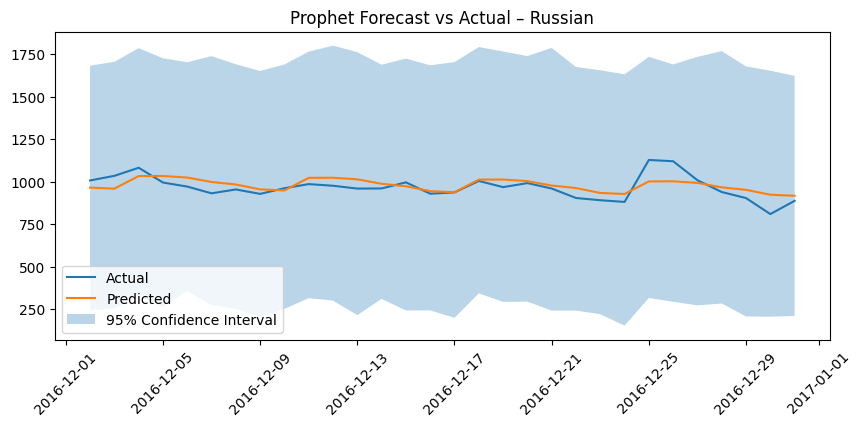

In [ ]:
df_r = ad_ease.reset_index().rename(
    columns={'Dates':'ds','Russian':'y'}
)
df_r = df_r.drop(['English','Chinese','German','French','Japanese','Spanish'], axis=1)
#Data split
train_r = df_r.iloc[:520]
test_r = df_r.iloc[520:]

#Fit Prophet model
m_r = Prophet(interval_width=0.95)
m_r = m_r.fit(train_r)
future = test_r[['ds']]
forecast_r=m_r.predict(future)

#Plot
plt.figure(figsize=(10,4))
plt.title("Prophet Forecast vs Actual – Russian")
plt.plot(test_r['ds'], test_r['y'], label='Actual')
plt.plot(forecast_r['ds'], forecast_r['yhat'], label='Predicted')

#Confidence interval
plt.fill_between(
    forecast_j['ds'], forecast_r['yhat_lower'], forecast_r['yhat_upper'],
    alpha=0.3, label = '95% Confidence Interval'
)
plt.xticks(rotation=45)
plt.legend()


In [ ]:

print('Russian :', mean_absolute_percentage_error(test_r['y'],forecast_r['yhat']))

Russian : 0.045060882547978166


*  The Prophet model **significantly outperforms SARIMA and ARIMA** reducing the MAPE from **0.12 to 0.04.** The Prophet model is about three times more accurate than SARIMA and ARIMA.

*  The forecasted time series produced by Prophet is more stable, indicating that it captures the underlying trend and seasonality more effectively while avoiding overfitting to random fluctuations.

*  Although Prophet fits the historical data well, the wide forecast intervals indicate high uncertainty due to irregular spikes and volatility in the time series.

**Prophet model for Spanish language**

In [ ]:
df_s = ad_ease.reset_index().rename(
    columns={'Dates':'ds','Spanish':'y'}
)
df_s = df_s.drop(['English','Chinese','German','French','Japanese','Russian'], axis=1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


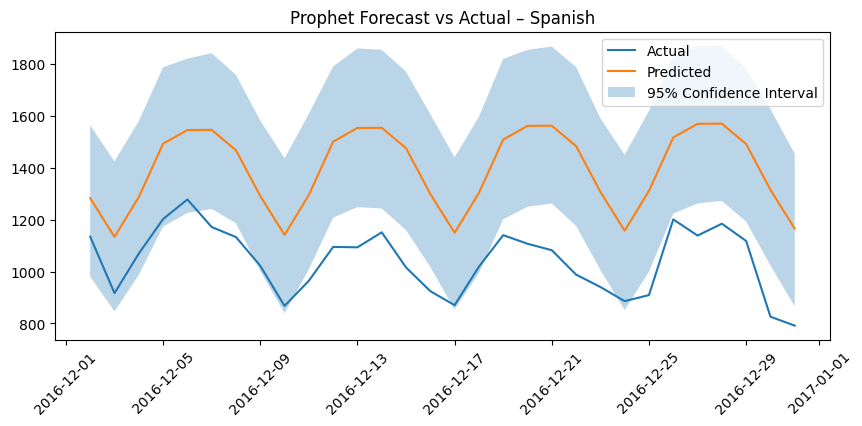

In [ ]:
df_s = ad_ease.reset_index().rename(
    columns={'Dates':'ds','Spanish':'y'}
)
df_s = df_s.drop(['English','Chinese','German','French','Japanese','Russian'], axis=1)

#Data split
train_s = df_s.iloc[:520]
test_s = df_s.iloc[520:]

#Fit Prophet model
m_s = Prophet(interval_width=0.95)
m_s = m_s.fit(train_s)
future = test_s[['ds']]
forecast_s=m_s.predict(future)

#Plot
plt.figure(figsize=(10,4))
plt.title("Prophet Forecast vs Actual – Spanish")
plt.plot(test_s['ds'], test_s['y'], label='Actual')
plt.plot(forecast_s['ds'], forecast_s['yhat'], label='Predicted')

#Confidence interval
plt.fill_between(
    forecast_s['ds'], forecast_s['yhat_lower'], forecast_s['yhat_upper'],
    alpha=0.3, label = '95% Confidence Interval'
)
plt.xticks(rotation=45)
plt.legend()

In [ ]:
print('Spanish :', mean_absolute_percentage_error(test_s['y'],forecast_s['yhat']))

Spanish : 0.3448598845126451


**Adding Holiday and Weekly Effects**

In [ ]:
new_s=df_s.copy()

In [ ]:
new_s['day_of_week']=new_s['ds'].dt.day_name()
weekend_days = {"Friday", "Saturday", "Sunday"}
new_s['is_weekend']=new_s['day_of_week'].isin(weekend_days).astype(int)
new_s['is_weekday']=(~new_s['day_of_week'].isin(weekend_days)).astype(int)
exo_cols = ['is_weekend','is_weekday']

In [ ]:

s_train=new_s.iloc[:520]
s_test=new_s.iloc[520:]
s_ml = Prophet(
    holidays=holidays,
    changepoint_prior_scale=0.4,
    seasonality_prior_scale=7,
    holidays_prior_scale=10
)

s_ml.add_regressor('is_weekday')
s_ml.add_regressor('is_weekend')

s_ml.add_seasonality(name='monthly', period=30.5, fourier_order=2)
s_ml.fit(s_train)
future = s_test[['ds','is_weekend','is_weekday']]
forecast_s=s_ml.predict(future)
mape(s_test['y'], forecast_s['yhat'])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.31023017207115805

**Interpretaion**

*  The Prophet model forecast plot reveals a significant **overprediction** and a failure to capture the true underlying pattern of the time series data.

* The model is too smooth, caputes the overall trend right, but it misses the true highs and lows.

*  Some Actual values fall outside the confidence band, the model is uncertain about how big future ups and downs might be.

*  This resulted in a **high MAPE of 0.3448**, which is about **11% higher** than that of the **SARIMAX model.**

*  Adding calendar effects reduced MAPE slightly (≈3%), but the improvement is marginal. This suggests that external factors such as marketing campaigns (Exog) likely play a larger role in driving Spanish traffic, while calendar-based effects have only limited impact.


#**Questionnaire**




**1. Defining the problem statements and where can this and modifications of this be used?**

*  The objective of this project is to forecast daily page views for Wikipedia pages using historical time-series data so that AdEase can predict future traffic and optimize ad placement, inventory allocation, and campaign planning.

*  By accurately predicting future page views, AdEase can ensure that ads are placed on pages with high expected visibility, leading to better click-through rates and lower cost per click for clients.

*  The same forecasting framework can be applied to other digital platforms such as Facebook, Instagram, YouTube, news websites, and e-commerce platforms to predict future traffic, user engagement, or product demand.

**2. Write 3 inferences you made from the data visualizations**

1.  Across all languages, English consistently has the highest average viewers count, indicating its broader reach or popularity.

2.  The initial dataset had 145063 records with null values, but after transposing/aggregating, nulls were automatically removed, showing that data transformation can help in cleaning and summarizing the data.

3.  The viewership trends show stable tremd with periodic patterns or seasonality, as seen in line plots, with occasional spikes or drops that might correspond to specific events or external factors.

**3. What does the decomposition of series do?**

*  Time series decomposition breaks a series into three main components:

**1. Trend** - the long-term movement in the data.

*    Shows whether the series is generally increasing, decreasing, or stable over time.

**2. Seasonality** - repeating patterns or cycles at fixed intervals.

*  For example, weekly, monthly, or yearly fluctuations.

**3. Residual / Noise** - the remaining part after removing trend and seasonality.

*  Captures random variations or unexplained changes in the data.

**4. What level of differencing gave you a stationary series?**

A first-level differencing (d = 1) was sufficient to make the series stationary.

**5. Difference between arima, sarima & sarimax.**

*  **ARIMA:**  Assumes a linear relationship between the time series and its lags. Models trend using AR (p), I(d), and MA(q) terms, but does not handle seasonality or exogenous variables.

*  **SARIMA:** Extends ARIMA by adding seasonal components (P, D, Q, s), but still does not include exogenous variables.

*  **SARIMAX:** Extends SARIMA by allowing external (exogenous) variables along with trend and seasonality.



**6. Compare the number of views in different languages**


*  English has the highest average viewers (18.95%) across all languages, followed by Japanese (16.06%).

*   German, French, and Chinese have roughly similar average viewers, accounting for 14.58%, 13.99%, and 13.54% respectively.

*  Spanish (11.06%) and Russian(11.81%) have the lowest average viewers among all languages.

**7.  What other methods other than grid search would be suitable to get the model for all languages?**

1. Time Series Cross-Validation (Rolling / Expanding Window CV).

2. Random Search / Bayesian Optimization.

3. Auto ARIMA (pmdarima)

4. Walk-Forward Validation

#**Recommendations**

**English**

*  For AdEase, **English** Wikipedia pages should be prioritized for ad placement because they have the highest traffic and the most reliable Prophet forecasts, leading to higher and more predictable ROI.This makes English pages ideal for always-on, long-term advertising strategies.

**Other major languages (Chinese, German, Japanese, French)**

*  Prophet already provides reasonably accurate and stable forecasts for these languages. Adding exogenous variables (such as campaigns or major events) would further improve forecast accuracy, allowing AdEase to place ads more efficiently and profitably in these regions.

**Spanish**

*  These time series show repeated highs and lows that are not random noise, but short-cycle oscillations likely driven by **regional holidays, news cycles,
cultural or social events. Because these external factors are not included in the current models, ARIMA, SARIMAX, and even Prophet show higher error.
To improve ad placement here, AdEase should add more historical data, and external variables. This will allow models to better anticipate traffic spikes and avoid missed revenue opportunities.

**Growth outlook across all languages**

*  All language time series show a slowly increasing baseline with short-term spikes and drops. This means viewer demand is expected to grow gradually, but daily behavior will remain dynamic and event-driven.

**Budgeting strategy for AdEase**

*  AdEase should allocate ad budgets using the forecast confidence interval (upper and lower bounds) rather than only point forecasts. This helps:

    *  avoid over-investment when traffic is uncertain

    *  avoid under-investment during high-demand periods
This leads to better ROI and lower risk.